【インテグレーションステップ】

Google Colab（Google Colaboratory）の管理する仮想マシンのOSなどを確認

▼参考

https://electric-blue-industries.com/2019/10/29/deep-learning-google-colab-%E3%83%81%E3%83%BC%E3%83%88%E3%82%B7%E3%83%BC%E3%83%88/

In [2]:
cat /proc/version

Linux version 4.19.112+ (builder@a12462ca91c8) (Chromium OS 10.0_pre377782_p20200113-r10 clang version 10.0.0 (/var/cache/chromeos-cache/distfiles/host/egit-src/llvm-project 4e8231b5cf0f5f62c7a51a857e29f5be5cb55734)) #1 SMP Thu Jul 23 08:00:38 PDT 2020


In [3]:
ls -l /etc/*release

-rw-r--r-- 1 root root 105 Aug 13  2020 /etc/lsb-release
lrwxrwxrwx 1 root root  21 Aug 13  2020 /etc/os-release -> ../usr/lib/os-release


In [4]:
cat /etc/lsb-release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"


In [5]:
!pip install japanize-matplotlib
!pip install git+https://github.com/pfnet-research/xfeat.git

     |████████████████████████████████| 4.1MB 5.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=1829b3c1e741b5c0d020aa0589c6eef52b4ebfeed715238e5f7df24876abd2af
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib
  Cloning https://github.com/pfnet-research/xfeat.git to /tmp/pip-req-build-ytu_a4ho
  Running command git clone -q https://github.com/pfnet-research/xfeat.git /tmp/pip-req-build-ytu_a4ho
     |████████████████████████████████| 296kB 4.5MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 163kB 8.3MB/s 
     |████████████████████████████████| 112kB 8.2MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 143kB 7.6MB/s 
     |████████████████████████████████| 81kB 4.9MB/s 
  Created wheel for xfeat: filename=xfeat-0.1.1-cp

In [7]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import ast
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import math
import json
from datetime import datetime as dt

#import pymysql
import re
#import janome
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from functools import partial

import optuna
# from xfeat import SelectCategorical, LabelEncoder, Pipeline, ConcatCombination, SelectNumerical, \
#     ArithmeticCombinations, TargetEncoder, aggregation, GBDTFeatureSelector, GBDTFeatureExplorer
# import category_encoders as ce

In [8]:
from importlib_metadata import distributions
import_package_list = []
for d in distributions():
    import_package_list.append(": ".join([d.metadata["Name"], d.version]))
print(import_package_list)

['python-apt: 0.0.0', 'pyperclip: 1.8.2', 'colorlog: 4.8.0', 'japanize-matplotlib: 1.1.3', 'xfeat: 0.1.1', 'alembic: 1.5.8', 'colorama: 0.4.4', 'cmd2: 1.5.0', 'cmaes: 0.8.2', 'ml-metrics: 0.1.4', 'cliff: 3.7.0', 'Mako: 1.1.4', 'python-editor: 1.0.4', 'optuna: 2.6.0', 'stevedore: 3.3.0', 'pbr: 5.5.1', 'google-colab: 1.0.0', 'sympy: 1.7.1', 'jupyter-client: 5.3.5', 'zipp: 3.4.1', 'python-louvain: 0.15', 'uritemplate: 3.0.1', 'et-xmlfile: 1.0.1', 'holidays: 0.10.5.2', 'google-cloud-core: 1.0.3', 'ecos: 2.0.7.post1', 'alabaster: 0.7.12', 'thinc: 7.4.0', 'nbclient: 0.5.3', 'textblob: 0.15.3', 'absl-py: 0.10.0', 'fastai: 1.0.61', 'google-cloud-bigquery: 1.21.0', 'pydata-google-auth: 1.1.0', 'pyviz-comms: 2.0.1', 'scipy: 1.4.1', 'humanize: 0.5.1', 'tblib: 1.7.0', 'okgrade: 0.4.3', 'lightgbm: 2.2.3', 'torchtext: 0.9.0', 'requests-oauthlib: 1.3.0', 'httplib2: 0.17.4', 'PyWavelets: 1.1.1', 'convertdate: 2.3.1', 'pydotplus: 2.0.2', 'en-core-web-sm: 2.2.5', 'gym: 0.17.3', 'pexpect: 4.8.0', 'fastdt

データの読み込み

In [9]:
from google.colab import files
uploaded = files.upload()

Saving summary-join.csv to summary-join.csv


In [10]:
# EDINETから取得しておいたデータ（事前にXBRL形式からCSV形式へ変換済み）を読み込んで、pandas.DataFrameオブジェクトを作成
df_company_info = pd.read_csv("summary-join.csv")

In [11]:
# データを読み込めたか確認
df_company_info.head()

,EDINETコード,証券コード,提出日,会計期間終了日,従業員数,平均臨時雇用人員,所有株式数,発行済株式（自己株式を除く。）の総数に対する所有株式数の割合,発行済株式総数,連結子会社の数,１株当たり純資産,自己資本比率,現金及び現金同等物の残高,資産,流動資産,固定資産,有形固定資産,無形固定資産,ソフトウエア,投資その他の資産,負債,流動負債,短期借入金,1年内償還予定の社債,1年内返済予定の長期借入金,固定負債,社債,転換社債型新株予約権付社債,コマーシャル・ペーパー,長期借入金,純資産,株主資本,資本金,資本剰余金,利益剰余金,自己株式,評価・換算差額等,売上高,売上原価,売上総利益,...,特別利益,特別損失,税引前純利益,法人税等,純利益,親会社株主に帰属する純利益,包括利益,１株当たり純利益,調整1株当たり純利益,１株当たり配当額,株価収益率,自己資本利益率,営業活動によるキャッシュ・フロー,減価償却費、営業活動によるキャッシュ・フロー,投資活動によるキャッシュ・フロー,財務活動によるキャッシュ・フロー,現金及び現金同等物の増減,前期資産,前期売上高,前期純利益,平均年齢,平均勤続年数,平均年間給与,粗利益,売上高総利益率,売上高営業利益率,売上高経常利益率,売上高販管費率,総資本回転率,流動比率,売上高変化率,純利益変化率,期首期末平均資産,総資産経常利益率,総資産純利益率,総資産親会社株主に帰属する純利益率,自己資本,有利子負債,会社名,業種
0,E00008,13790.0,2016-06-24,2016-03-31,1253.0,2546.0,16408000.0,0.4919,NaN,6.0,1555.69,0.597,4.660000e+09,8.347600e+10,1.602900e+10,6.744700e+10,6.009800e+10,563000000.0,NaN,6.784000e+09,3.359500e+10,2.735100e+10,1.465700e+10,NaN,7.730000e+08,6.243000e+09,NaN,NaN,NaN,5.060000e+09,4.988100e+10,4.988800e+10,5.500000e+09,5.799000e+09,4.092900e+10,-2.340000e+09,-3.600000e+07,6.098700e+10,4.425100e+10,1.673600e+10,...,6.680000e+08,4.250000e+08,4.317000e+09,1.719000e+09,2.598000e+09,2.598000e+09,1.513000e+09,81.20,81.13,NaN,27.41,0.052,8.744000e+09,5.345000e+09,-9.353000e+09,1.164000e+09,5.120000e+08,8.179200e+10,6.094900e+10,3.696000e+09,NaN,NaN,NaN,1.673600e+10,0.274419,0.056209,0.066801,0.218210,0.730593,0.586048,0.000623,-0.297078,8.263400e+10,0.049302,0.031440,0.031440,4.985200e+10,2.049000e+10,ホクト,水産・農林業
1,E00008,13790.0,2017-06-23,2017-03-31,1326.0,2602.0,16446000.0,0.4930,NaN,6.0,1610.83,0.546,5.473000e+09,9.473800e+10,1.799000e+10,7.674700e+10,6.835000e+10,403000000.0,NaN,7.993000e+09,4.300100e+10,2.901500e+10,1.666900e+10,NaN,7.710000e+08,1.398600e+10,NaN,NaN,NaN,1.253800e+10,5.173600e+10,5.094100e+10,5.500000e+09,5.828000e+09,4.183500e+10,-2.222000e+09,7.950000e+08,6.311900e+10,4.554100e+10,1.757800e+10,...,2.500000e+07,1.730000e+08,4.231000e+09,1.402000e+09,2.828000e+09,2.828000e+09,3.660000e+09,88.17,88.16,NaN,22.76,0.056,8.000000e+09,6.191000e+09,-1.494700e+10,7.779000e+09,8.130000e+08,8.347600e+10,6.098700e+10,2.598000e+09,NaN,NaN,NaN,1.757800e+10,0.278490,0.054342,0.069377,0.224132,0.666248,0.620024,0.034958,0.088530,8.910700e+10,0.049143,0.031737,0.031737,5.173600e+10,2.997800e+10,ホクト,水産・農林業
2,E00008,13790.0,2018-06-22,2018-03-31,4006.0,NaN,15430000.0,0.4793,NaN,6.0,1630.91,0.522,7.788000e+09,1.005560e+11,2.184100e+10,7.871400e+10,6.919100e+10,253000000.0,NaN,9.270000e+09,4.805500e+10,3.483400e+10,2.070100e+10,NaN,8.330000e+08,1.322000e+10,NaN,NaN,NaN,1.170300e+10,5.250000e+10,5.141100e+10,5.500000e+09,5.695000e+09,4.232600e+10,-2.111000e+09,1.089000e+09,6.690700e+10,4.878400e+10,1.812200e+10,...,0.000000e+00,1.270000e+08,3.906000e+09,1.487000e+09,2.418000e+09,2.418000e+09,2.712000e+09,75.22,NaN,NaN,26.92,0.046,9.938000e+09,6.668000e+09,-9.028000e+09,1.447000e+09,2.314000e+09,9.473800e+10,6.311900e+10,2.828000e+09,NaN,NaN,NaN,1.812300e+10,0.270869,0.047544,0.060278,0.223295,0.665371,0.627002,0.060014,-0.144979,9.764700e+10,0.041302,0.024763,0.024763,5.250000e+10,3.323700e+10,ホクト,水産・農林業
3,E00008,13790.0,2019-06-21,2019-03-31,4166.0,NaN,14993000.0,0.4732,NaN,7.0,1642.24,0.502,8.329000e+09,1.036060e+11,2.247000e+10,8.113600e+10,7.236500e+10,363000000.0,NaN,8.406000e+09,5.157500e+10,2.526500e+10,1.092300e+10,NaN,1.043000e+09,2.630900e+10,NaN,NaN,NaN,1.549400e+10,5.203000e+10,5.163000e+10,5.500000e+09,5.697000e+09,4.352900e+10,-3.096000e+09,4.000000e+08,7.018300e+10,5.114500e+10,1.903800e+10,...,1.280000e+08,1.900000e+08,4.548000e+09,1.359000e+09,3.188000e+09,3.188000e+09,2.499000e+09,99.87,90.48,NaN,19.20,0.061,9.572000e+09,7.110000e+09,-1.030500e+10,1.194000e+09,4.980000e+08,1.001380e+11,6.690700e+10,2.418000e+09,36.8,11.0,5402067.0,1.903800e+10,0.271262,0.049912,0.065685,0.221336,0.677403,0.889373,0.048963,0.318445,1.018720e+11,0.045253,0.031294,0.031294,5.203000e+10,2.746000e+10,ホクト,水産・農林業
4,E00008,13790.0,2020-06-26,2020-03-31,4181.0,NaN,14697000.0,0.4639,NaN,8.0,1616.78,0.502,1.140000e

In [12]:
# データ数を確認
print(df_company_info.shape)

(17278, 89)


In [13]:
# 要約統計量を確認
df_company_info.describe()

,証券コード,従業員数,平均臨時雇用人員,所有株式数,発行済株式（自己株式を除く。）の総数に対する所有株式数の割合,発行済株式総数,連結子会社の数,１株当たり純資産,自己資本比率,現金及び現金同等物の残高,資産,流動資産,固定資産,有形固定資産,無形固定資産,ソフトウエア,投資その他の資産,負債,流動負債,短期借入金,1年内償還予定の社債,1年内返済予定の長期借入金,固定負債,社債,転換社債型新株予約権付社債,コマーシャル・ペーパー,長期借入金,純資産,株主資本,資本金,資本剰余金,利益剰余金,自己株式,評価・換算差額等,売上高,売上原価,売上総利益,販売費及び一般管理費,給料及び手当,減価償却費、販売費及び一般管理費,...,支払利息,経常利益,特別利益,特別損失,税引前純利益,法人税等,純利益,親会社株主に帰属する純利益,包括利益,１株当たり純利益,調整1株当たり純利益,１株当たり配当額,株価収益率,自己資本利益率,営業活動によるキャッシュ・フロー,減価償却費、営業活動によるキャッシュ・フロー,投資活動によるキャッシュ・フロー,財務活動によるキャッシュ・フロー,現金及び現金同等物の増減,前期資産,前期売上高,前期純利益,平均年齢,平均勤続年数,平均年間給与,粗利益,売上高総利益率,売上高営業利益率,売上高経常利益率,売上高販管費率,総資本回転率,流動比率,売上高変化率,純利益変化率,期首期末平均資産,総資産経常利益率,総資産純利益率,総資産親会社株主に帰属する純利益率,自己資本,有利子負債
count,17260.000000,14773.000000,11004.000000,1.720200e+04,17202.000000,0.0,13938.000000,14118.000000,14116.000000,1.411200e+04,1.434500e+04,1.433700e+04,1.399100e+04,1.425800e+04,1.385900e+04,4.800000e+03,1.398900e+04,1.434300e+04,1.433700e+04,1.003200e+04,2.056000e+03,7.085000e+03,1.387800e+04,2.835000e+03,2.100000e+02,2.850000e+02,1.046800e+04,1.399600e+04,1.399600e+04,1.434400e+04,1.410400e+04,1.434400e+04,1.373800e+04,1.334200e+04,1.357700e+04,1.364200e+04,1.334300e+04,1.416300e+04,5.632000e+03,6.117000e+03,...,1.301100e+04,1.399100e+04,1.087500e+04,1.242500e+04,1.398900e+04,1.396800e+04,1.353000e+04,1.353000e+04,1.411200e+04,14108.000000,3947.000000,0.0,13159.000000,13415.000000,1.434000e+04,1.387900e+04,1.433900e+04,1.432200e+04,1.424900e+04,1.408700e+04,1.332800e+04,1.328400e+04,6395.000000,6394.000000,6.378000e+03,1.336700e+04,13367.000000,13511.000000,13511.000000,13486.000000,13577.000000,14337.000000,13326.000000,13284.000000,1.408700e+04,13738.000000,13288.000000,13288.000000,1.727800e+04,1.727800e+04
mean,56610.205098,5173.429432,1990.400282,3.873742e+07,0.526703,NaN,16.282250,1531.477453,0.520502,4.117675e+10,3.270227e+11,9.882212e+10,1.003067e+11,6.819421e+10,5.610649e+09,4.415728e+09,2.480316e+10,2.235354e+11,6.592660e+10,1.236144e+10,6.067805e+09,4.679741e+09,4.877417e+10,4.512222e+10,1.662417e+10,3.921929e+10,2.999019e+10,8.527239e+10,7.670831e+10,1.367427e+10,1.546144e+10,6.699451e+10,-3.502536e+09,4.568223e+09,1.583725e+11,1.308661e+11,3.364788e+10,3.143514e+10,5.965535e+09,2.005332e+09,...,5.427651e+08,1.011802e+10,1.322241e+09,2.001029e+09,9.323703e+09,3.084618e+09,6.275933e+09,5.980569e+09,5.295125e+09,101.339171,112.516858,NaN,33.019577,0.075086,1.456031e+10,6.172708e+09,-1.024323e+10,-1.773769e+09,2.281139e+09,3.255207e+11,1.574733e+11,6.255687e+09,40.645356,12.320199,6.151473e+06,3.679755e+10,0.301008,0.022830,0.023358,0.276116,1.151109,2.474037,0.055302,0.135713,3.290343e+11,0.058000,0.032239,0.031379,6.566494e+10,3.624081e+10
std,23826.298207,19132.634135,8458.608715,1.919616e+08,0.165038,NaN,32.838788,1814.654784,0.206531,9.750139e+11,5.495354e+12,4.055588e+11,4.535697e+11,3.166579e+11,3.109980e+10,3.837474e+10,1.018607e+11,5.179223e+12,3.222608e+11,5.593003e+10,2.848715e+10,4.160097e+10,2.820436e+11,1.658576e+11,2.299637e+10,8.436818e+10,1.440440e+11,3.690306e+11,3.038981e+11,8.176389e+10,9.831745e+10,2.700486e+11,2.162541e+10,6.131630e+10,5.231202e+11,5.107314e+11,1.008097e+11,1.151747e+11,1.797386e+10,1.037984e+10,...,2.987646e+09,3.884606e+10,1.120352e+10,1.590134e+10,3.673499e+10,1.229329e+10,2.722335e+10,2.615416e+10,3.557546e+10,183.072237,134.057486,NaN,175.287265,0.162780,7.900575e+10,3.032420e+10,1.413217e+11,5.400867e+10,1.167171e+11,5.574438e+12,5.269835e+11,2.694384e+10,4.403063,5.592020,1.638499e+06,1.285507e+11,0.172448,1.535501,1.552373,1.535620,0.658127,2.424379,0.368905,44.524445,5.559517e+12,0.077973,0.081090,0.080398,3.062573e+11,2.305517e+11
min,13010.000000,3.000000,0.000000,2.140000e+03,0.065300,NaN,0.000000,-907.070000,-7.232000,-2.642140e+08,1.777210e+08,1.060700e+08,3.545000e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.280000e+05,2.725100e+07,2.725100e+07,0.000000e+00,5.000000e+06,0.000000e+00,0.000000e+00,2.253000e+06,2.000000e+07,5.000000e+08,0.000000e+00,-5.915400e+10,-6.088200e+10,1.000000e+06,-1.339150e+11,-4.502510e+11,-8

In [14]:
# どんなデータ型があるのかの確認
df_company_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17278 entries, 0 to 17277
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EDINETコード                       17278 non-null  object 
 1   証券コード                           17260 non-null  float64
 2   提出日                             17273 non-null  object 
 3   会計期間終了日                         17278 non-null  object 
 4   従業員数                            14773 non-null  float64
 5   平均臨時雇用人員                        11004 non-null  float64
 6   所有株式数                           17202 non-null  float64
 7   発行済株式（自己株式を除く。）の総数に対する所有株式数の割合  17202 non-null  float64
 8   発行済株式総数                         0 non-null      float64
 9   連結子会社の数                         13938 non-null  float64
 10  １株当たり純資産                        14118 non-null  float64
 11  自己資本比率                          14116 non-null  float64
 12  現金及び現金同等物の残高                    

欠損値の対応

In [15]:
# 欠損値の有無を確認
df_company_info.isnull().sum().sum()

434872

In [16]:
# 欠損値の有無を確認（欠損値の内訳）
null_contain_df = df_company_info[df_company_info.isnull().any(axis=1)]
df_company_info.isnull().sum().sort_values(ascending=False)

発行済株式総数          17278
１株当たり配当額         17278
転換社債型新株予約権付社債    17068
コマーシャル・ペーパー      16993
1年内償還予定の社債       15222
                 ...  
業種                   0
会社名                  0
自己資本                 0
有利子負債                0
EDINETコード            0
Length: 89, dtype: int64

In [17]:
# 欠損値の割合
(df_company_info.isnull().sum() / len(df_company_info)).sort_values(ascending=False) * 100

発行済株式総数          100.000000
１株当たり配当額         100.000000
転換社債型新株予約権付社債     98.784582
コマーシャル・ペーパー       98.350504
1年内償還予定の社債        88.100475
                    ...    
業種                 0.000000
会社名                0.000000
自己資本               0.000000
有利子負債              0.000000
EDINETコード          0.000000
Length: 89, dtype: float64

In [18]:
# 欠損値は、平均値に置き換え
df_company_info.fillna(df_company_info.mean(), inplace=True)
# 平均で置き換えできないものは、0で置き換え
df_company_info.fillna(0, inplace=True)
df_company_info.isnull().sum().sum()

0

文字列に欠損値が含まれる場合は別途対応が必要

※入れ子のdictが文字列になってる場合とかは未対応（再帰処理とかでどうにかするしか無さそう...）

▼参考

https://qiita.com/rana_kualu/items/7c957851a058c1ae7808

In [19]:
# 文字列に"NaN"が含まれる場合は"0"に置換に置換するメソッド
def checkIncludeNaNstr(x):
  if type(x) == str and "nan" in x:
    x.replace("nan", "0")
  return x

# 文字列がJSONかどうかを判定するメソッド
def is_json_format(x):
    if type(x) != str:
      return x
    try:
        json.loads(x)
        result = convertStrToJson(x)
        return result
    except json.JSONDecodeError:
        return x

# JSON文字列からJSONへ変換するメソッド
def convertStrToJson(x):
  result = ast.literal_eval(x)
  return result

# dictからSeriesオブジェクトを作成するメソッド
def create_series(dict_value):
  return pd.Series(list(dict_value.values()), index=list(dict_value.keys()))

# 値がJSONか判定する
def checkJSON(x):
  if type(x) == json:
    return True
  else:
    return False

In [20]:
# 文字列に"NaN"値が含まれてる値が存在する場合は、"0"に置換
df_company_info = df_company_info.applymap(lambda x: checkIncludeNaNstr(x))

In [21]:
# 文字列のJSONが含まれる値が存在する場合は、JSONパース
df_company_info = df_company_info.applymap(lambda x: is_json_format(x))

In [22]:
df_company_info.dtypes

EDINETコード             object
証券コード                float64
提出日                   object
会計期間終了日               object
従業員数                 float64
                      ...   
総資産親会社株主に帰属する純利益率    float64
自己資本                 float64
有利子負債                float64
会社名                   object
業種                    object
Length: 89, dtype: object

文字列を含む要素を持つ列（カラム）を洗い出す

In [23]:
# 数値に変換できない値を持つ要素を持つ列（カラム）名のリストを作成するメソッド
def getColumnByStrValueList(s, columList):
  try:
    pd.to_numeric(s, errors="raise")
  except Exception as e:
    columList.append(s.name)

In [24]:
# 数値に変換できない値を要素として持つ列（カラム）名のリスト
cloumnIncludStrValueLists = []
df_company_info.apply(lambda s: getColumnByStrValueList(s, cloumnIncludStrValueLists))
cloumnIncludStrValueLists

['EDINETコード', '提出日', '会計期間終了日', '会社名', '業種']

In [25]:
# 数値に変換できない値を要素として持つ列（カラム）がどんな値を持ってるのか確認
df_company_info[cloumnIncludStrValueLists]

,EDINETコード,提出日,会計期間終了日,会社名,業種
0,E00008,2016-06-24,2016-03-31,ホクト,水産・農林業
1,E00008,2017-06-23,2017-03-31,ホクト,水産・農林業
2,E00008,2018-06-22,2018-03-31,ホクト,水産・農林業
3,E00008,2019-06-21,2019-03-31,ホクト,水産・農林業
4,E00008,2020-06-26,2020-03-31,ホクト,水産・農林業
...,...,...,...,...,...
17273,E35287,2020-06-26,2020-03-31,ランサーズ,情報・通信業
17274,E35303,2020-06-26,2020-03-31,ランディックス,不動産業
17275,E35335,2020-06-29,2020-03-31,ＷＤＢココ,サービス業
17276,E35487,2020-06-25,2020-03-31,フォーラムエンジニアリング,サービス業


カテゴリ変数に変換

In [26]:
df_company_info = pd.get_dummies(df_company_info, drop_first=True, columns=['業種'])

日付文字列は、datetime型に変換します

In [27]:
df_company_info["提出日"] = pd.to_datetime(df_company_info["提出日"])
df_company_info["会計期間終了日"] = pd.to_datetime(df_company_info["会計期間終了日"])

In [28]:
# 年のカラムを追加
df_company_info["提出日(年)"]  = df_company_info["提出日"].dt.year
# df_company_info["提出日(月)"]  = df_company_info["提出日"].dt.month
df_company_info["会計期間終了日(年)"]  = df_company_info["会計期間終了日"].dt.year
# df_company_info["会計期間終了日(月)"]  = df_company_info["会計期間終了日"].dt.month

In [29]:
import unicodedata

In [30]:
def join_diacritic(text, mode="NFKC"):
    """
    基底文字と濁点・半濁点を結合
    """
    # str -> bytes
    bytes_text = text.encode()

    # 濁点Unicode結合文字置換
    bytes_text = re.sub(b"\xe3\x82\x9b", b'\xe3\x82\x99', bytes_text)
    bytes_text = re.sub(b"\xef\xbe\x9e", b'\xe3\x82\x99', bytes_text)

    # 半濁点Unicode結合文字置換
    bytes_text = re.sub(b"\xe3\x82\x9c", b'\xe3\x82\x9a', bytes_text)
    bytes_text = re.sub(b"\xef\xbe\x9f", b'\xe3\x82\x9a', bytes_text)

    # bytet -> str
    text = bytes_text.decode()

    # 正規化
    text = unicodedata.normalize(mode, text)
    #text = unicodedata.normalize('NFKC', text)
    tr = str.maketrans(dict(zip('()!', '（）！')))
    text = text.translate(tr)

    return text

In [31]:
#df_company_info.rename(columns=lambda x:  unicodedata.normalize('NFKC', x), inplace=True)
df_company_info.rename(columns=lambda x:  join_diacritic(x, 'NFKC'), inplace=True)
df_company_info.columns

Index(['EDINETコード', '証券コード', '提出日', '会計期間終了日', '従業員数', '平均臨時雇用人員', '所有株式数',
       '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数',
       ...
       '業種_金属製品', '業種_鉄鋼', '業種_鉱業', '業種_陸運業', '業種_電気・ガス業', '業種_電気機器',
       '業種_非鉄金属', '業種_食料品', '提出日（年）', '会計期間終了日（年）'],
      dtype='object', length=118)

ソフトウェア開発を受注してそうな企業数を確認してみる

▼参考

https://vision-cash.com/cf/cf/depreciation-and-amortization/

In [32]:
# ソフトウエアが、NULLじゃない企業
null_contain_df[~null_contain_df["ソフトウエア"].isnull()][~null_contain_df["EDINETコード"].duplicated()]["会社名"]

90        ビーアールホールディングス
120      北海道コカ・コーラボトリング
135           ユアサ・フナショク
140               キユーピー
150                あじかん
              ...      
17242          システムサポート
17264               ＫＨＣ
17269     ブランディングテクノロジー
17273             ランサーズ
17277       きずなホールディングス
Name: 会社名, Length: 917, dtype: object

In [33]:
soft_order_company_list = list(set(pd.unique(df_company_info[df_company_info['ソフトウエア'] ==0]["会社名"])))
print(len(df_company_info[~df_company_info["EDINETコード"].duplicated()].index) - len(null_contain_df[null_contain_df["ソフトウエア"].isnull()][~null_contain_df["EDINETコード"].duplicated()]["会社名"].index) - len(soft_order_company_list))

909


In [34]:
# 大企業と中小企業に分けるためのリストを用意
# 【中小企業基本法第2条第1項】
# 資本金の額又は出資の総額が3億円以下の会社並びに常時使用する従業員の数が300人以下の会社及び個人であつて、
# 製造業、建設業、運輸業その他の業種（次号から第4号までに掲げる業種を除く。）に属する事業を主たる事業として営むもの
small_to_medium_list = df_company_info[(df_company_info["資本金"] <= 300000000) & (df_company_info["従業員数"] <= 300)]["EDINETコード"]

In [35]:
# 大企業と中小企業に分ける
# 中小企業
small_to_medium_df = df_company_info[df_company_info["EDINETコード"].isin(small_to_medium_list) == True]
# 大企業
large_df = df_company_info[df_company_info["EDINETコード"].isin(small_to_medium_list) == False]

In [36]:
# 企業数を確認
print("中小企業の数：{0}, 大企業の数：{1}".format(len(small_to_medium_df[~df_company_info["EDINETコード"].duplicated()].index), len(large_df[~df_company_info["EDINETコード"].duplicated()].index)))

中小企業の数：161, 大企業の数：3441


機械学習

In [37]:
from sklearn.cluster import KMeans

In [38]:
exclude_cols = ['EDINETコード', '提出日', '会計期間終了日', '会社名']
feature_cols = [col for col in df_company_info.columns if col not in exclude_cols]

In [39]:
# エルボー法で最適なクラスタリング数を算出するメソッド
def elbowMethod(num):
  distortions = []
  max_cluster = 15
  if num < 15:
    max_cluster = num

  for i  in range(1,max_cluster):                   # 1~14クラスタまで計算 
      km = KMeans(n_clusters=i, random_state=1234)  # K-meansを実行
      km.fit(data)                                  # クラスタリングの計算を実行
      distortions.append(km.inertia_)               # km.fitするとkm.inertia_が得られる

  plt.plot(range(1,max_cluster),distortions,marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.show()

# 実際にK-meansでクラスタリングするメソッド
def doneKmeans(cluster_num, data):
  km =KMeans(n_clusters=cluster_num, random_state=1234)
  km.fit(data)
  cluster_label = km.predict(data)
  data["cluster_labels"] = cluster_label
  return km 

In [40]:
def plotClusterResult(cluster_num, df_data, confirm_list, target):
  # 各クラスタリングをグラフで表示
  #x = pd.unique(data["会計期間終了日(年)"])
  #plt.xticks(data["会計期間終了日(年)"], [2016, 2017, 2018, 2019, 2020])  
  #col_name = unicodedata.normalize('NFKC', "現金及び現金同等物の残高") 
  #col_name =  unicodedata.normalize('NFKC', "会計期間終了日(年)")
  col_name =  join_diacritic("会計期間終了日（年）", 'NFKC')
  if col_name in confirm_list:
    confirm_list.remove(col_name)
  for col in confirm_list:
  #for col in data.columns:
    #unicodedata.normalize('NFKC', col)
    fig, axes = plt.subplots(nrows=1, ncols=cluster_num, figsize=(24, 4))
    for i in range(cluster_num):
      #plt.xticks(range(len(x)), x)
      #print(df_data[col])
      #data[data["cluster_labels"] == i].plot(x=data["会計期間終了日(年)"].name, y=data[col].name, ax=axes[i], title="".join(["クラスター", "",str(i) ,":【", col, "】"]), color='blue', alpha=0.3, legend=False)
      df_data[df_data["cluster_labels"] == i].plot(x=df_data[col_name].name, y=df_data[col].name, ax=axes[i], title="".join(["クラスター", "",str(i) ,":【", col, "】"]), color='blue', alpha=0.1, legend=False)
    plt.savefig("".join([target, ":【", col, "】.png"]))
  confirm_list.append(col_name)

In [41]:
#confirm_list = ['従業員数', '平均臨時雇用人員', '所有株式数', '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数', '１株当たり純資産', '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産', 'ソフトウエア', '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金', '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金']
confirm_list = ['従業員数', '平均臨時雇用人員', '所有株式数', '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数', '１株当たり純資産', '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産', 'ソフトウエア', '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金', '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー', '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '会計期間終了日(年)']
#confirm_list = list(map(lambda x: unicodedata.normalize("NFKC", x), confirm_list))
confirm_list = list(map(lambda x: join_diacritic(x, "NFKC"), confirm_list))
confirm_list

['従業員数',
 '平均臨時雇用人員',
 '所有株式数',
 '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合',
 '発行済株式総数',
 '連結子会社の数',
 '1株当たり純資産',
 '自己資本比率',
 '現金及び現金同等物の残高',
 '資産',
 '流動資産',
 '固定資産',
 '有形固定資産',
 '無形固定資産',
 'ソフトウエア',
 '投資その他の資産',
 '負債',
 '流動負債',
 '短期借入金',
 '1年内償還予定の社債',
 '1年内返済予定の長期借入金',
 '固定負債',
 '社債',
 '転換社債型新株予約権付社債',
 'コマーシャル・ペーパー',
 '長期借入金',
 '営業活動によるキャッシュ・フロー',
 '減価償却費、営業活動によるキャッシュ・フロー',
 '投資活動によるキャッシュ・フロー',
 '財務活動によるキャッシュ・フロー',
 '会計期間終了日（年）']

In [42]:
# 集計結果を表示
def groupbyTarget(cluster_num, df_data, target):
  for i in range(cluster_num):
    print("".join(["クラスター", str(i), "\n{0}"]).format(df_data[df_data["cluster_labels"]==i].groupby(target).size()))

# ①典型的な安定企業の条件で抽出
def bool_first_company_conditions_result(df_data):
  return df_data[(df_data['営業活動によるキャッシュ・フロー'] > 0) & (df_data['投資活動によるキャッシュ・フロー'] < 0) & (df_data['財務活動によるキャッシュ・フロー'] < 0)]

# ②積極投資の成長企業の条件で抽出
def bool_second_company_conditions_result(df_data):
  return df_data[(df_data['営業活動によるキャッシュ・フロー'] > 0) & (df_data['投資活動によるキャッシュ・フロー'] < 0) & (df_data['財務活動によるキャッシュ・フロー'] > 0)]

# 業種の割合を表示
def printIndustryRatio(df_data):
  print(((df_data[df_data.columns[(df_data.columns.str.contains('業種')==True)]]==1)[~df_data["EDINETコード"].duplicated()].sum().sort_values(ascending=False)) / len(df_data[df_data.columns[(df_data.columns.str.contains('業種')==True)]][~df_data["EDINETコード"].duplicated()].index) * 100)


中小企業

In [43]:
data = small_to_medium_df[confirm_list]
data.fillna(0, inplace=True)

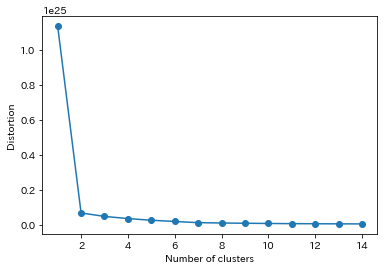

In [44]:
elbowMethod(len(data.index))

In [45]:
cluster_num = 3
km = doneKmeans(cluster_num, data)

In [46]:
data.columns

Index(['従業員数', '平均臨時雇用人員', '所有株式数', '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合',
       '発行済株式総数', '連結子会社の数', '1株当たり純資産', '自己資本比率', '現金及び現金同等物の残高', '資産',
       '流動資産', '固定資産', '有形固定資産', '無形固定資産', 'ソフトウエア', '投資その他の資産', '負債', '流動負債',
       '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金', '固定負債', '社債', '転換社債型新株予約権付社債',
       'コマーシャル・ペーパー', '長期借入金', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー',
       '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '会計期間終了日（年）', 'cluster_labels'],
      dtype='object')

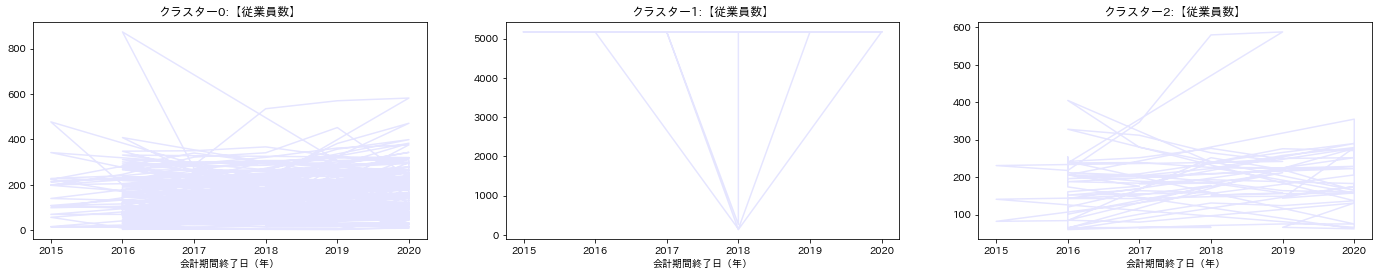

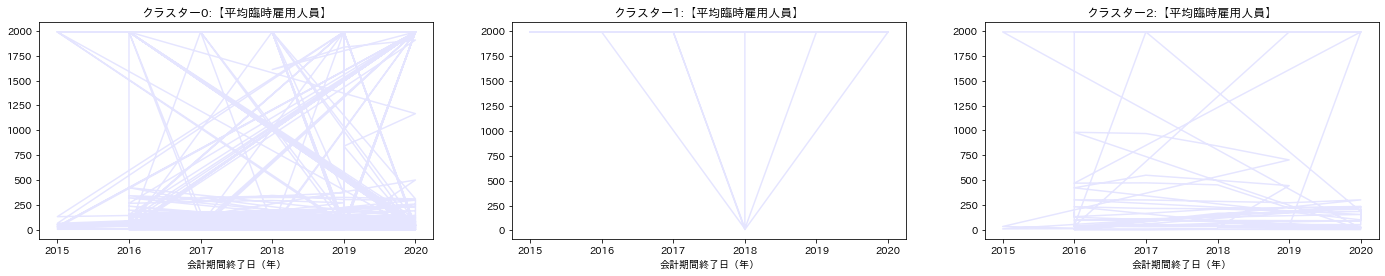

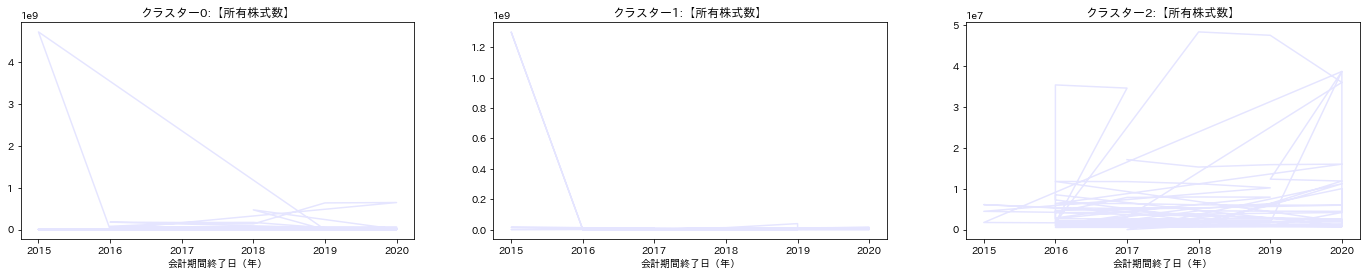

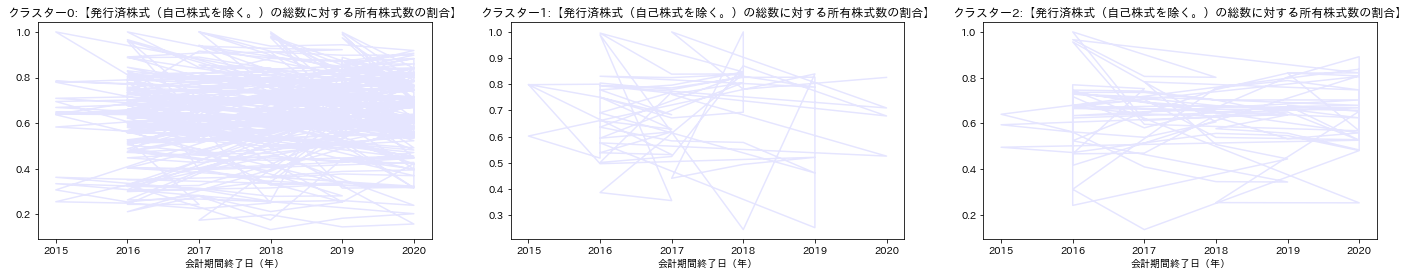

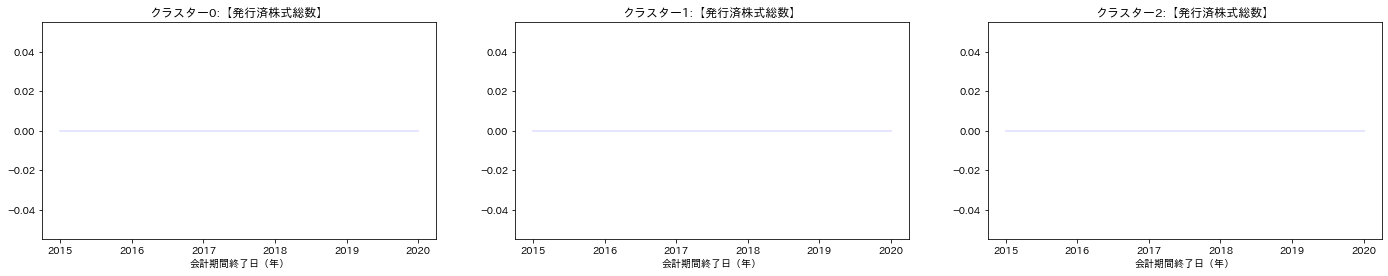

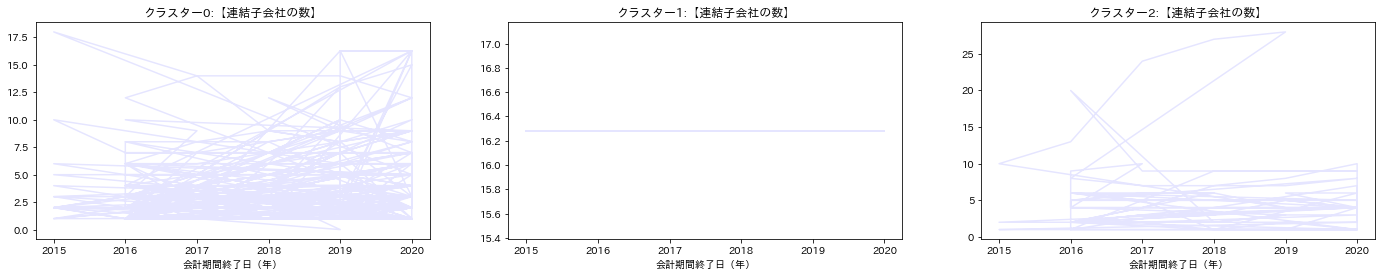

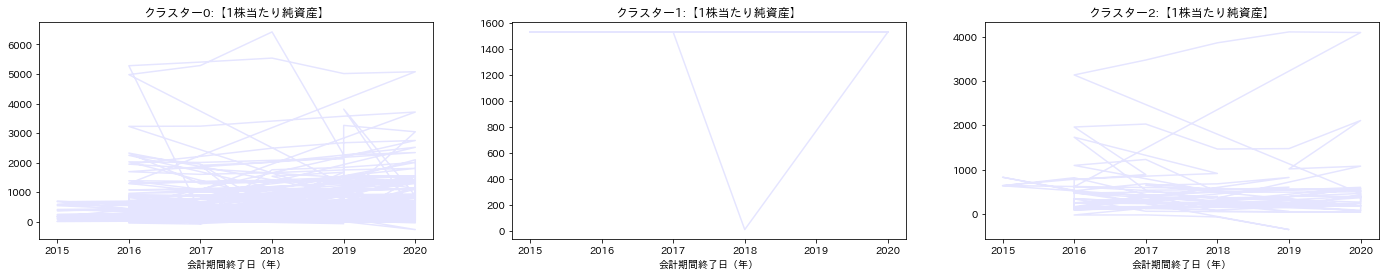

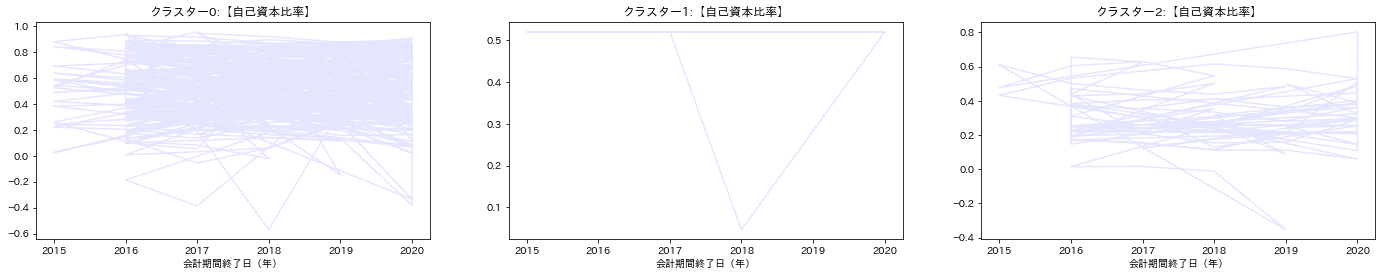

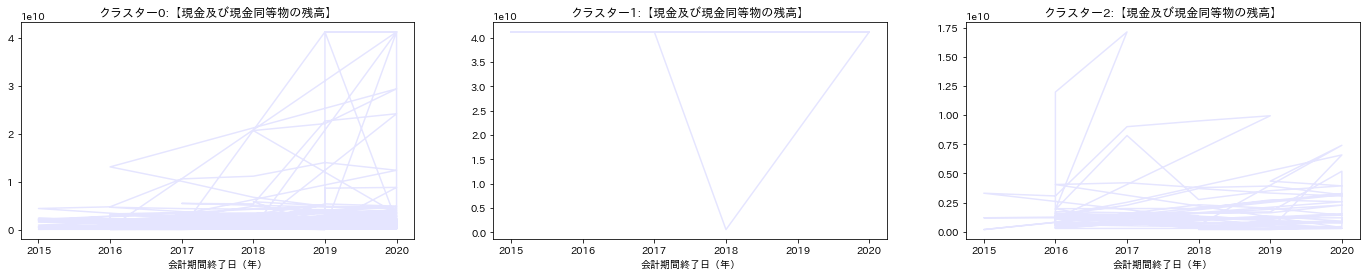

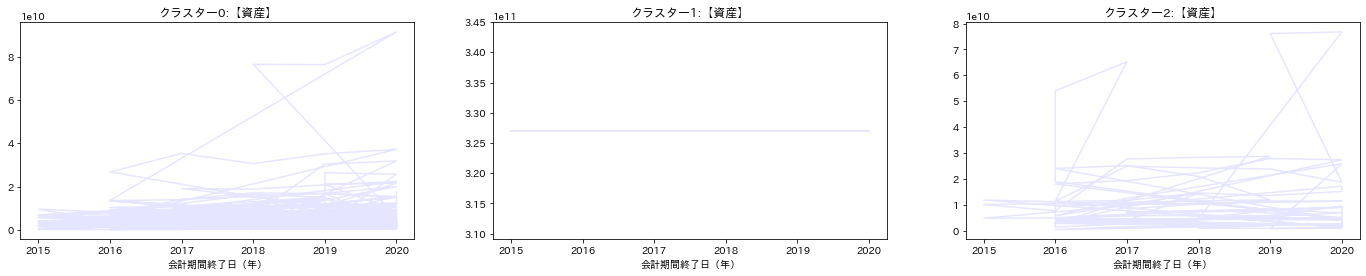

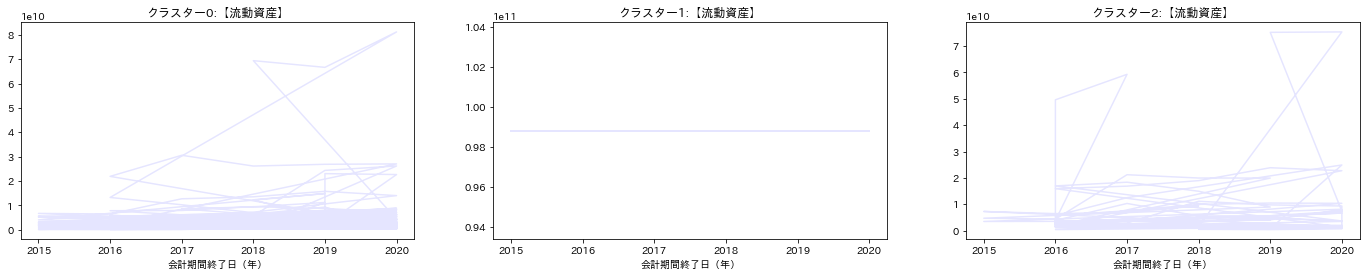

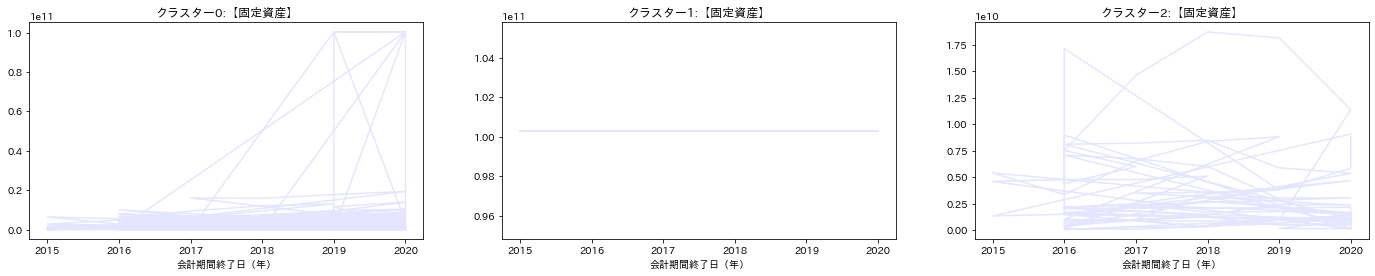

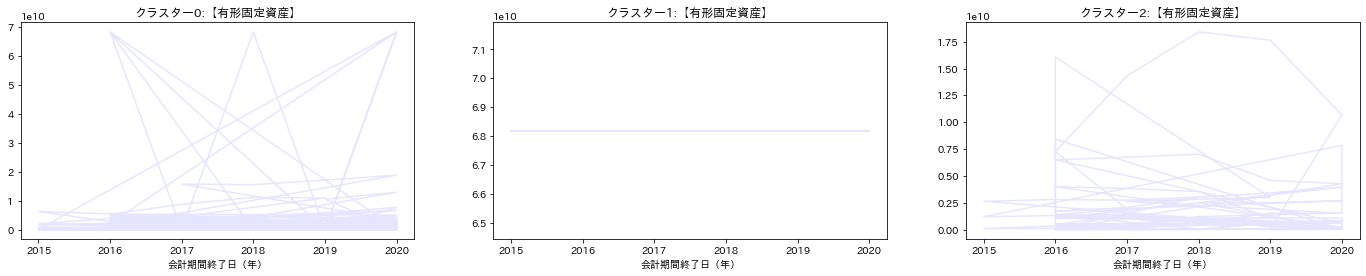

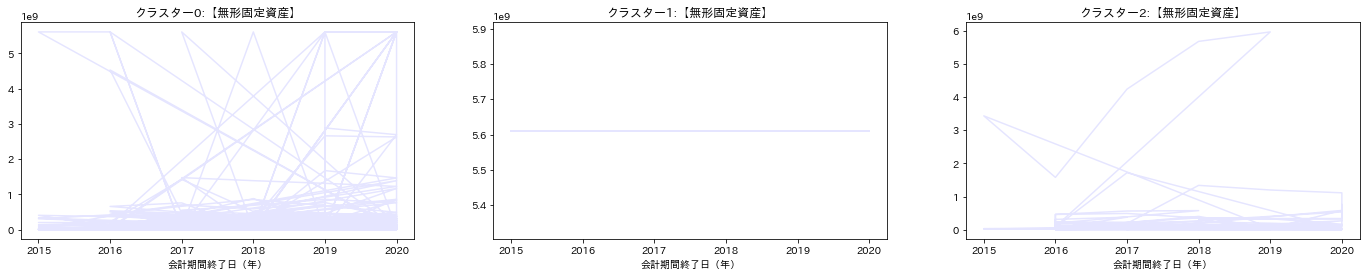

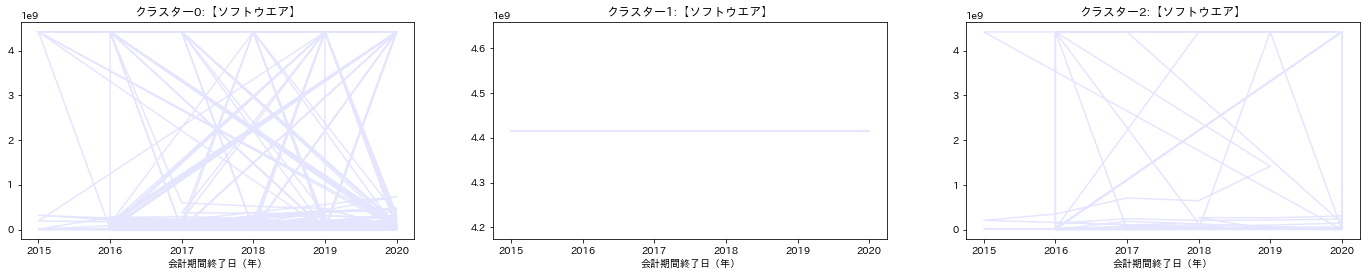

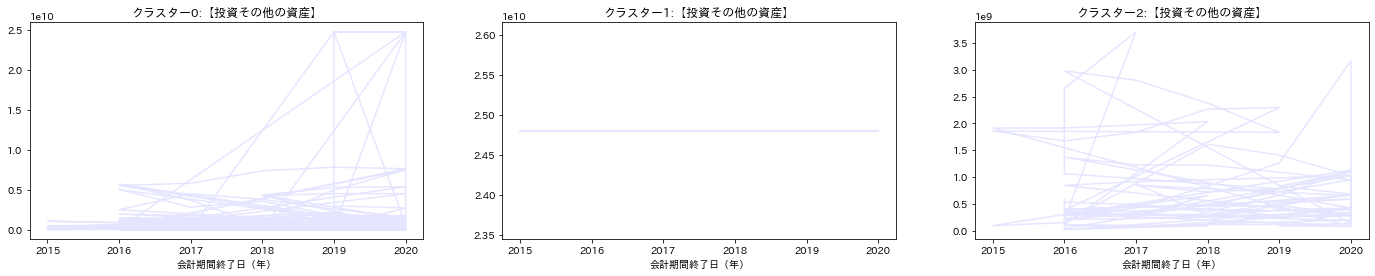

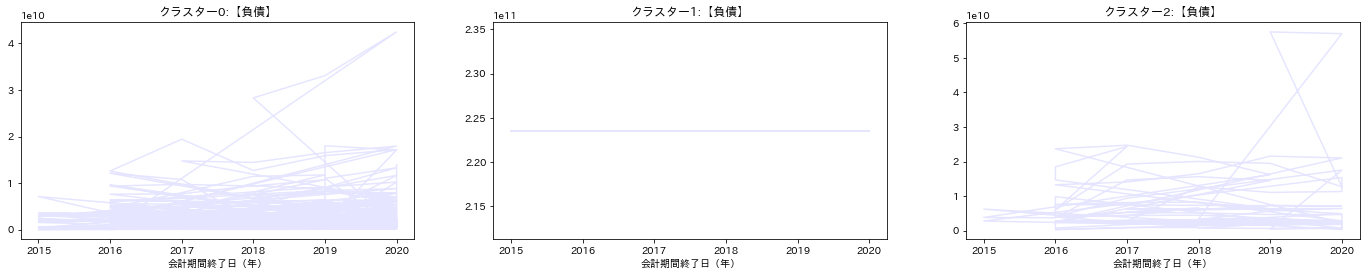

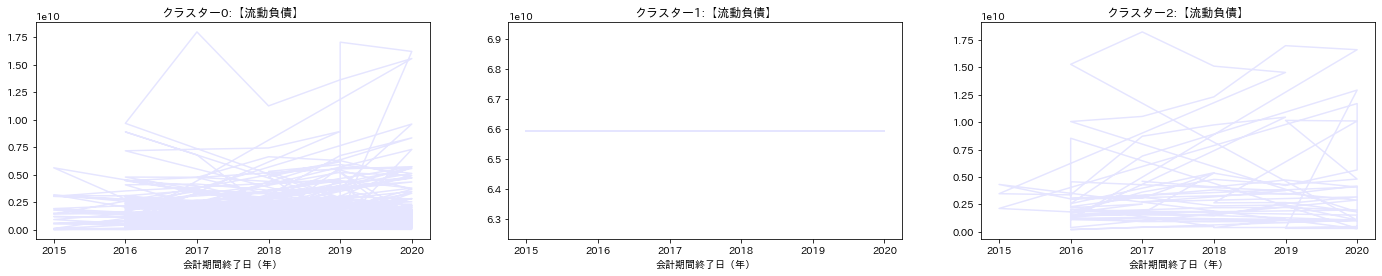

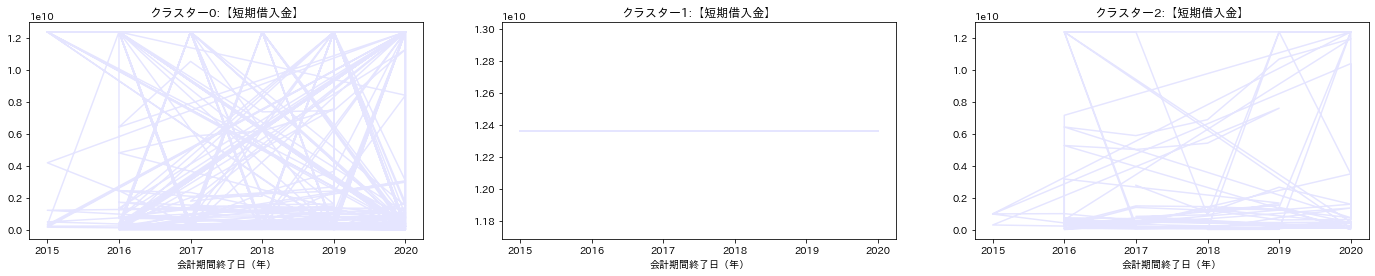

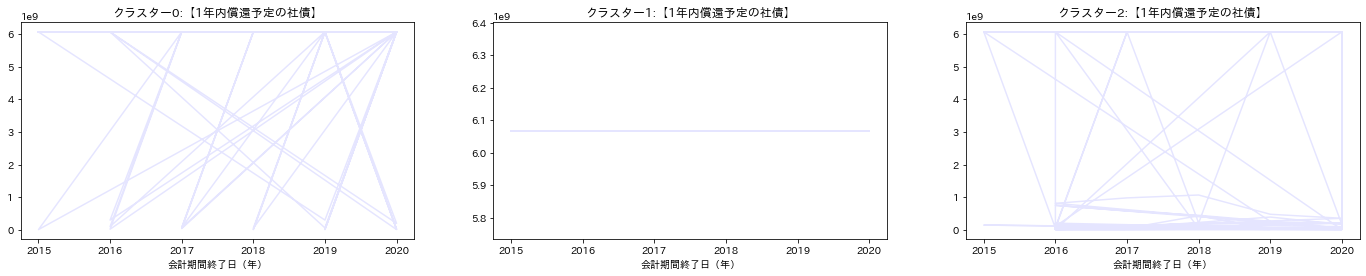

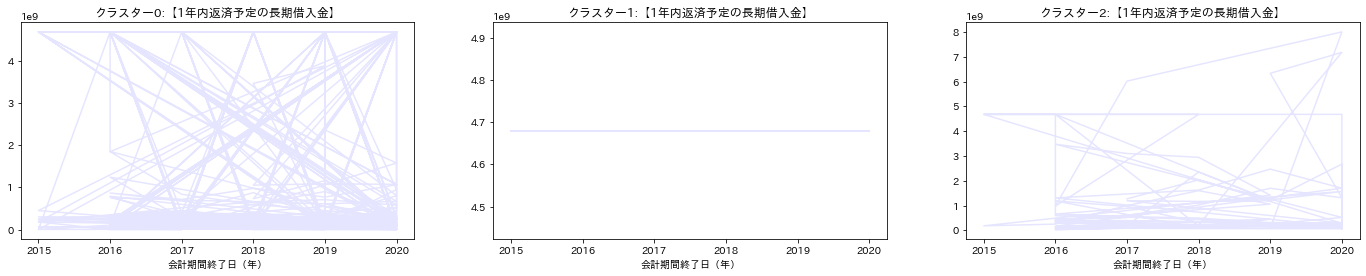

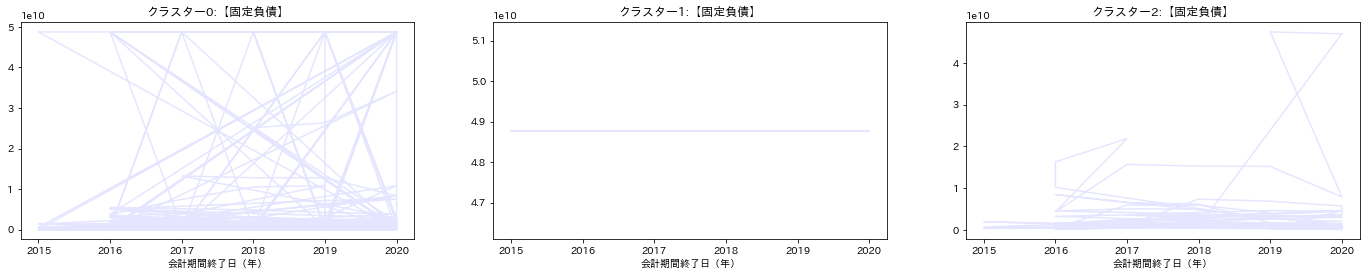

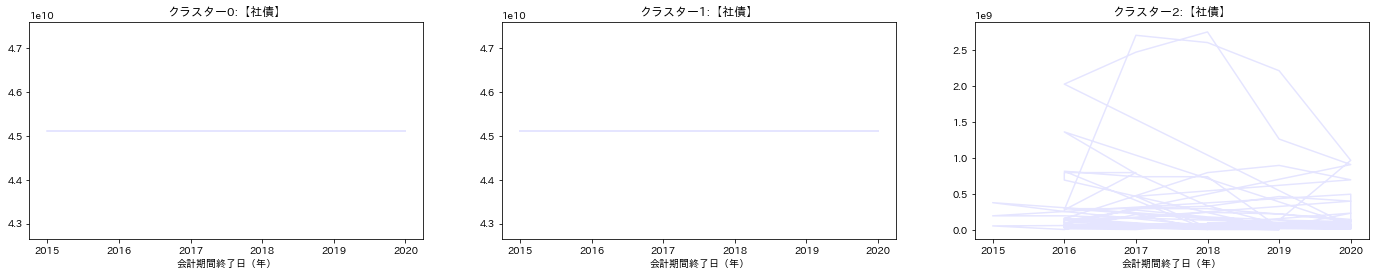

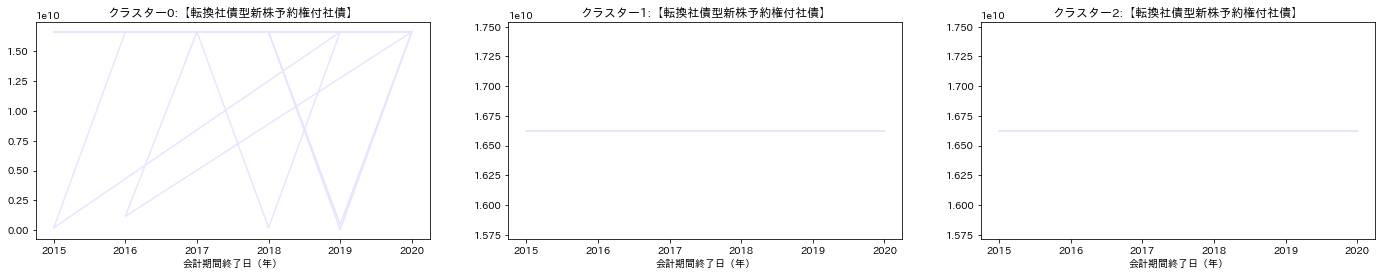

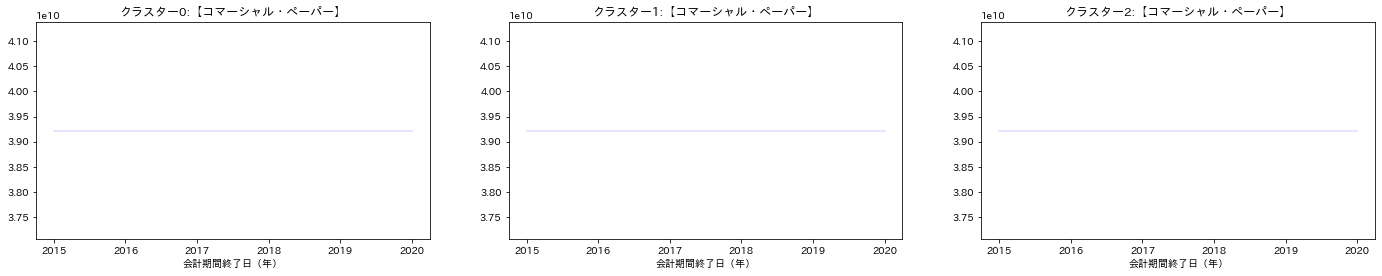

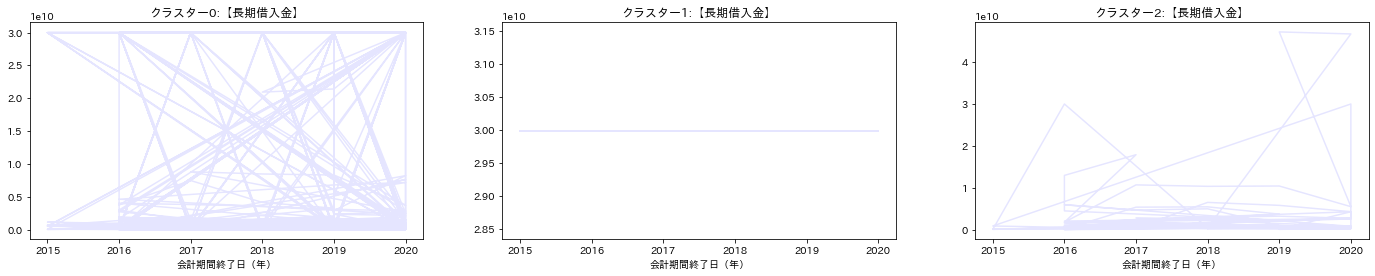

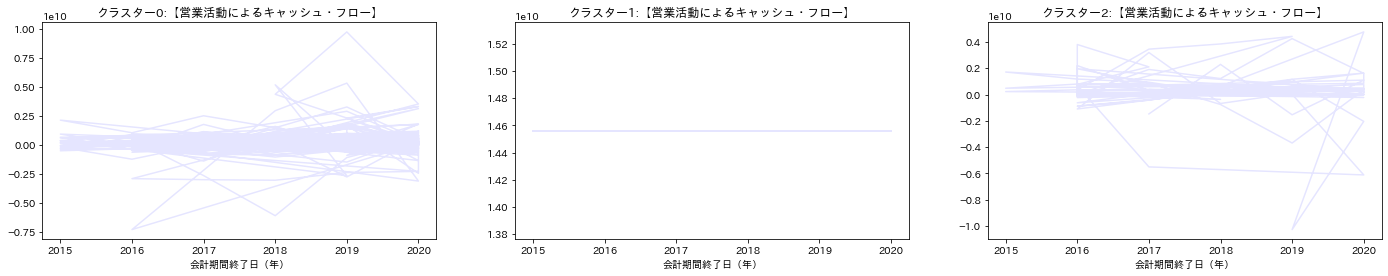

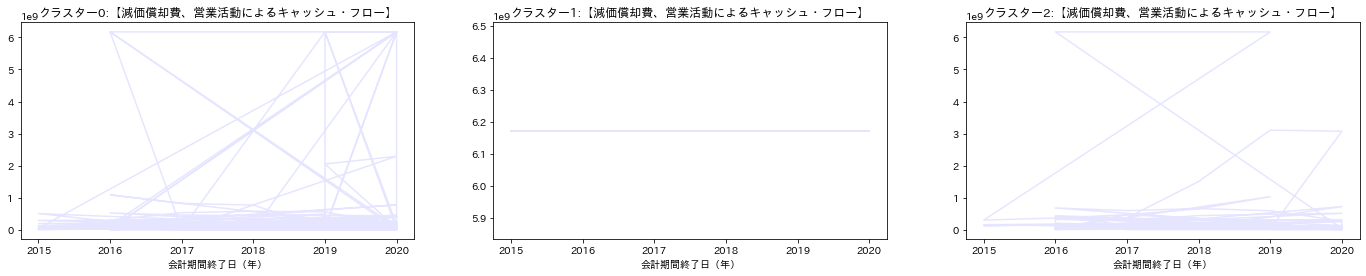

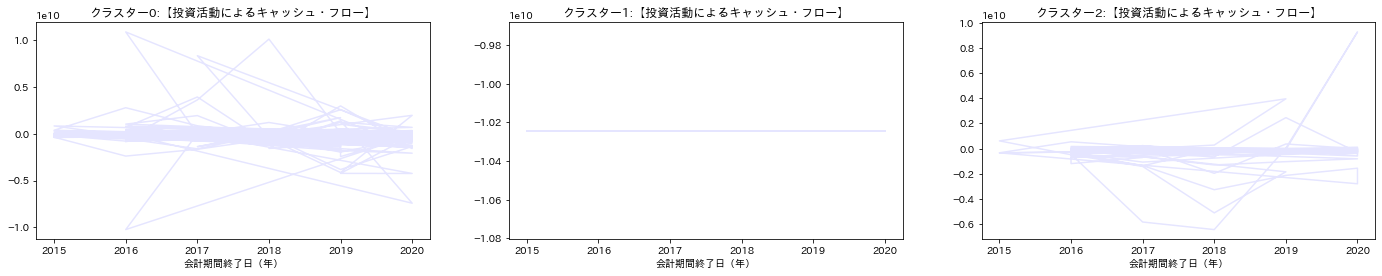

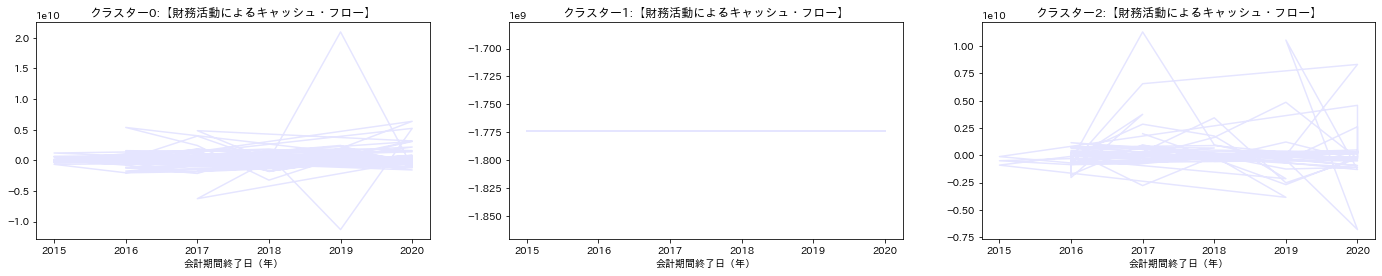

In [47]:
plotClusterResult(cluster_num, data, confirm_list, "中小企業")

①典型的な安定企業

営業活動によるキャッシュ・フロー > 0

投資活動によるキャッシュ・フロー < 0

財務活動によるキャッシュ・フロー < 0

②積極投資の成長企業

営業活動によるキャッシュ・フロー > 0

投資活動によるキャッシュ・フロー < 0

財務活動によるキャッシュ・フロー > 0

In [48]:
tmp_data = pd.concat([small_to_medium_df, data["cluster_labels"]], axis=1)
result_df_first = bool_first_company_conditions_result(tmp_data)
result_df_second = bool_second_company_conditions_result(tmp_data)
print("①典型的な安定企業の数：{0}, ②積極投資の成長企業の数：{1}".format(len(result_df_first.index), len(result_df_second.index)))

①典型的な安定企業の数：317, ②積極投資の成長企業の数：153


In [49]:
target = "会計期間終了日（年）"
groupbyTarget(cluster_num, result_df_first, target)

クラスター0
会計期間終了日（年）
2015     5
2016    29
2017    31
2018    47
2019    50
2020    45
dtype: int64
クラスター1
会計期間終了日（年）
2015     3
2016    21
2017    17
2018    13
2019     6
2020     4
dtype: int64
クラスター2
会計期間終了日（年）
2015     2
2016     8
2017     6
2018    11
2019     9
2020    10
dtype: int64


In [50]:
groupbyTarget(cluster_num, result_df_second, target)

クラスター0
会計期間終了日（年）
2015     3
2016    18
2017    27
2018    26
2019    28
2020    27
dtype: int64
クラスター1
Series([], dtype: int64)
クラスター2
会計期間終了日（年）
2016    3
2017    8
2018    4
2019    3
2020    6
dtype: int64


In [51]:
printIndustryRatio(result_df_first)

業種_サービス業       25.78125
業種_情報・通信業      22.65625
業種_卸売業         10.93750
業種_不動産業         9.37500
業種_小売業          9.37500
業種_建設業          3.12500
業種_ガラス・土石製品     2.34375
業種_機械           2.34375
業種_非鉄金属         1.56250
業種_電気機器         1.56250
業種_化学           1.56250
業種_輸送用機器        1.56250
業種_医薬品          0.78125
業種_食料品          0.78125
業種_精密機器         0.78125
業種_繊維製品         0.78125
業種_金属製品         0.78125
業種_鉄鋼           0.78125
業種_陸運業          0.78125
業種_海運業          0.00000
業種_石油・石炭製品      0.00000
業種_空運業          0.00000
業種_鉱業           0.00000
業種_倉庫・運輸関連      0.00000
業種_パルプ・紙        0.00000
業種_電気・ガス業       0.00000
業種_ゴム製品         0.00000
業種_水産・農林業       0.00000
dtype: float64


In [52]:
printIndustryRatio(result_df_second)

業種_サービス業       31.460674
業種_情報・通信業      28.089888
業種_卸売業         11.235955
業種_小売業          8.988764
業種_不動産業         5.617978
業種_ガラス・土石製品     2.247191
業種_輸送用機器        2.247191
業種_建設業          2.247191
業種_陸運業          1.123596
業種_精密機器         1.123596
業種_非鉄金属         1.123596
業種_電気機器         1.123596
業種_繊維製品         1.123596
業種_パルプ・紙        0.000000
業種_倉庫・運輸関連      0.000000
業種_化学           0.000000
業種_医薬品          0.000000
業種_ゴム製品         0.000000
業種_食料品          0.000000
業種_機械           0.000000
業種_海運業          0.000000
業種_石油・石炭製品      0.000000
業種_空運業          0.000000
業種_金属製品         0.000000
業種_鉄鋼           0.000000
業種_鉱業           0.000000
業種_電気・ガス業       0.000000
業種_水産・農林業       0.000000
dtype: float64


大企業

In [53]:
data = large_df[confirm_list]
data.fillna(0, inplace=True)

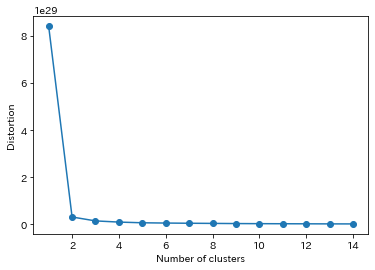

In [54]:
elbowMethod(len(data.index))

In [55]:
cluster_num = 3
km = doneKmeans(cluster_num, data)

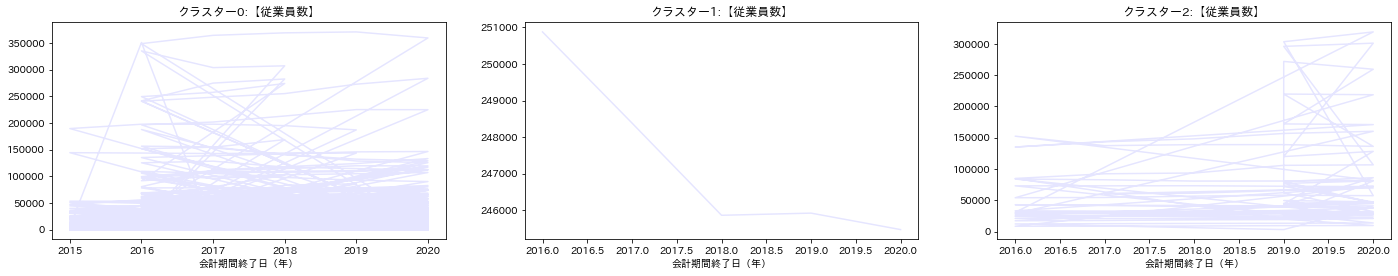

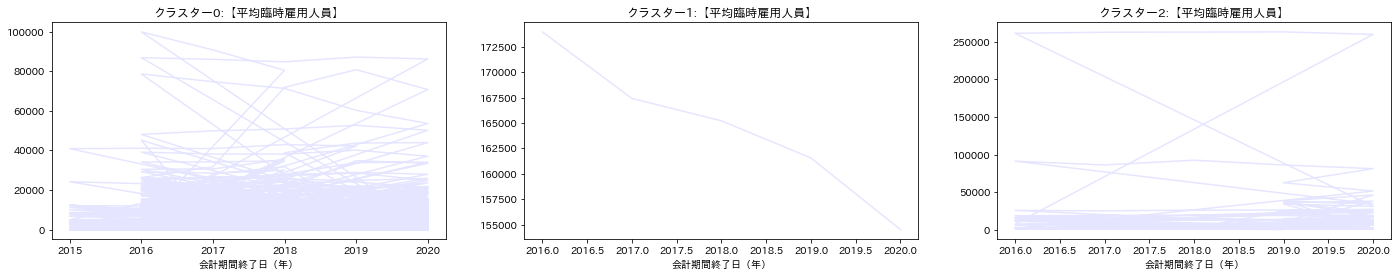

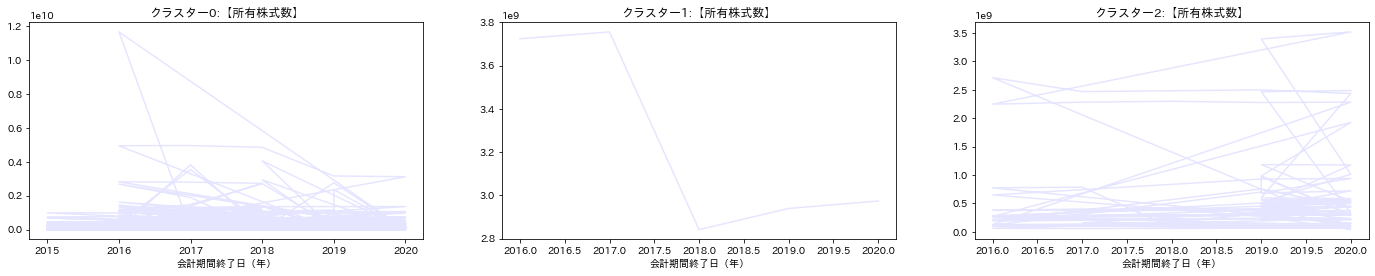

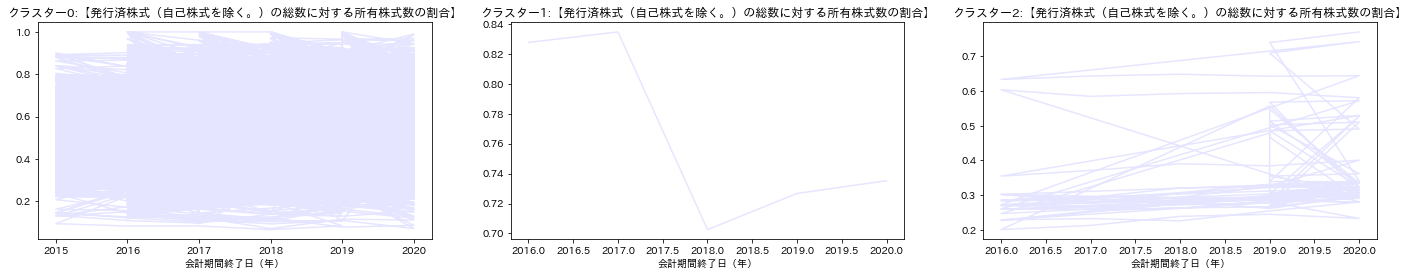

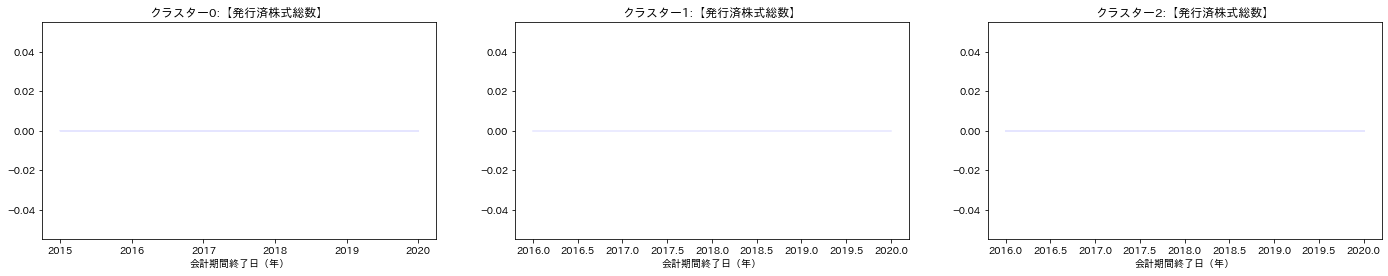

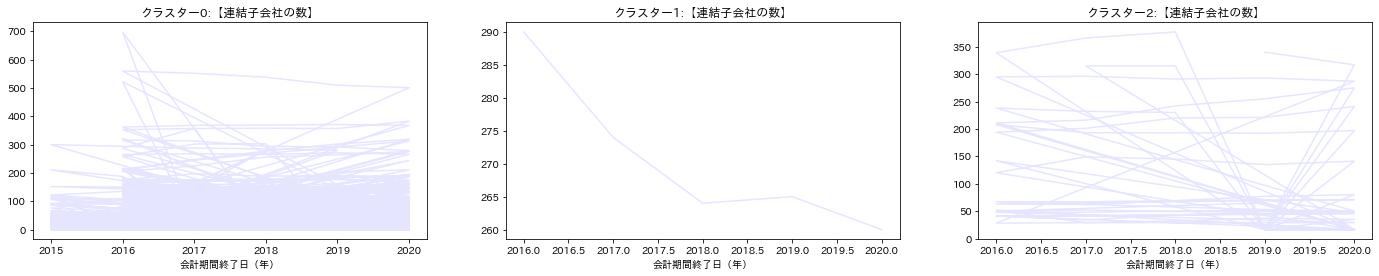

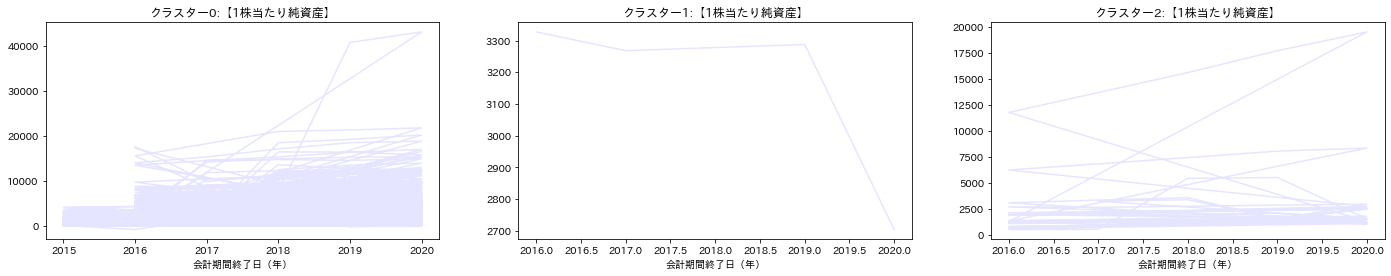

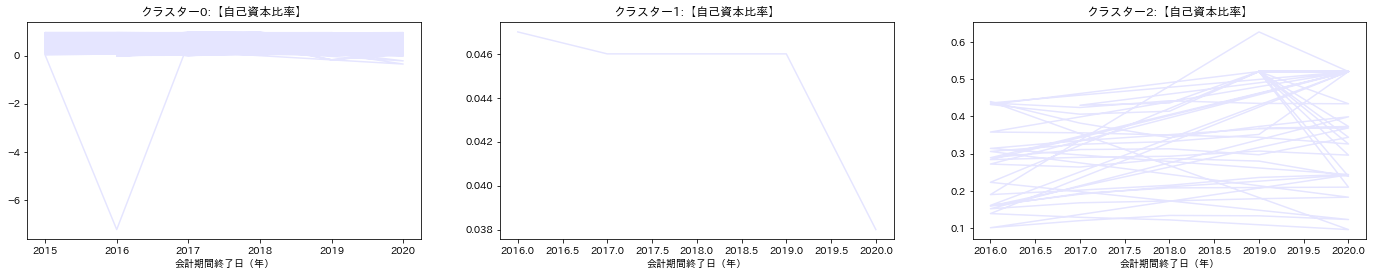

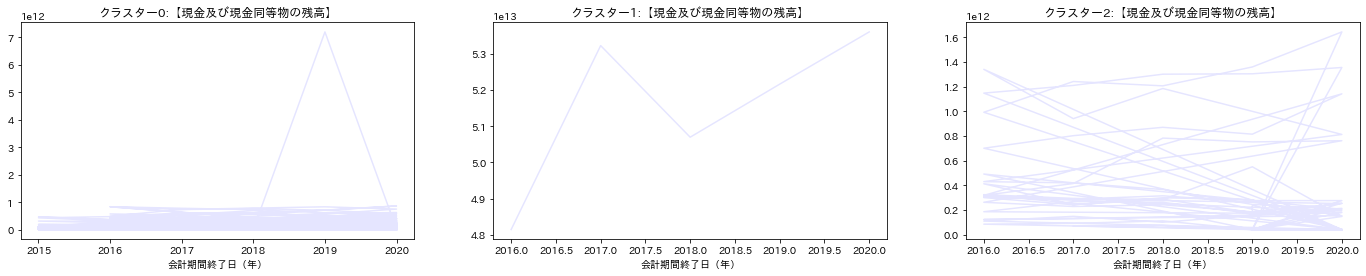

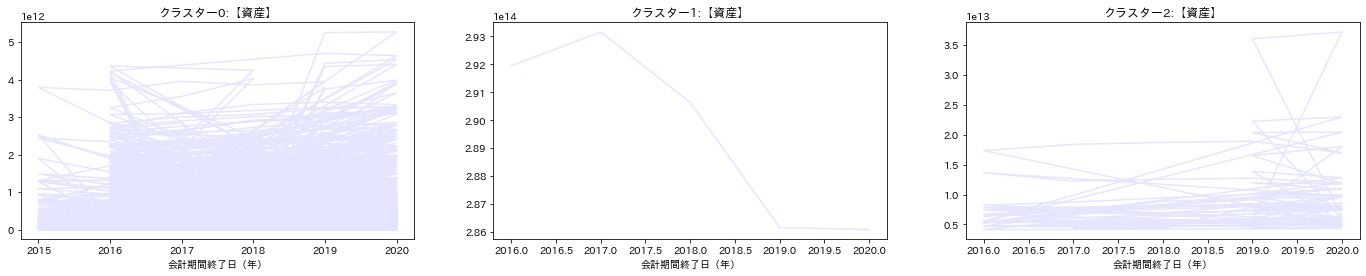

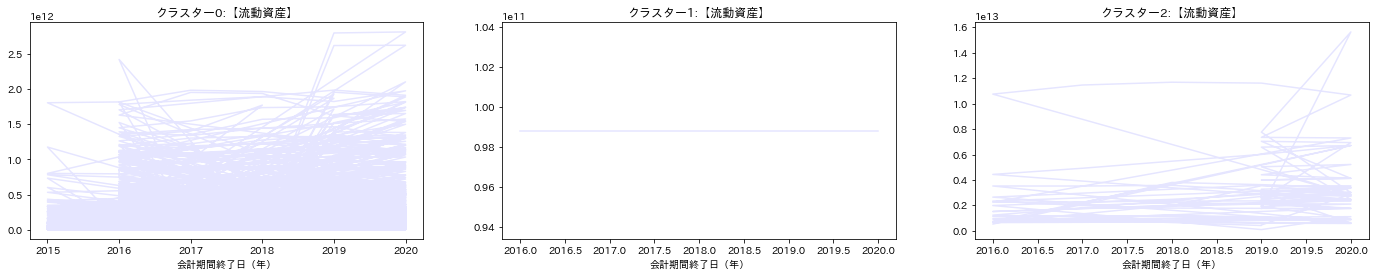

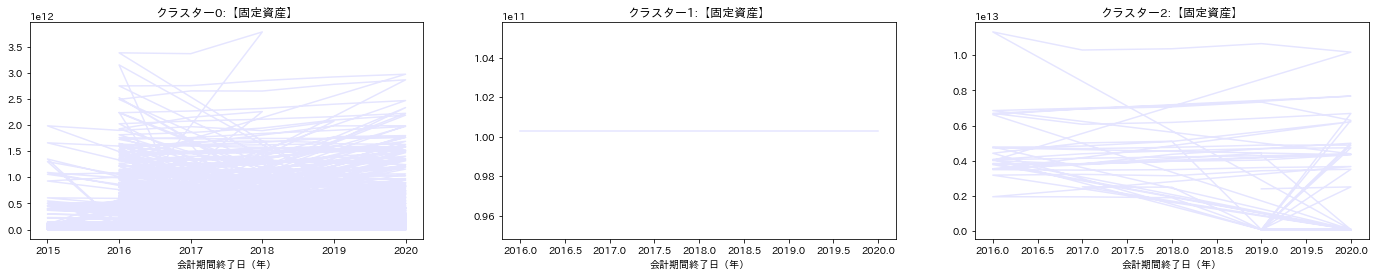

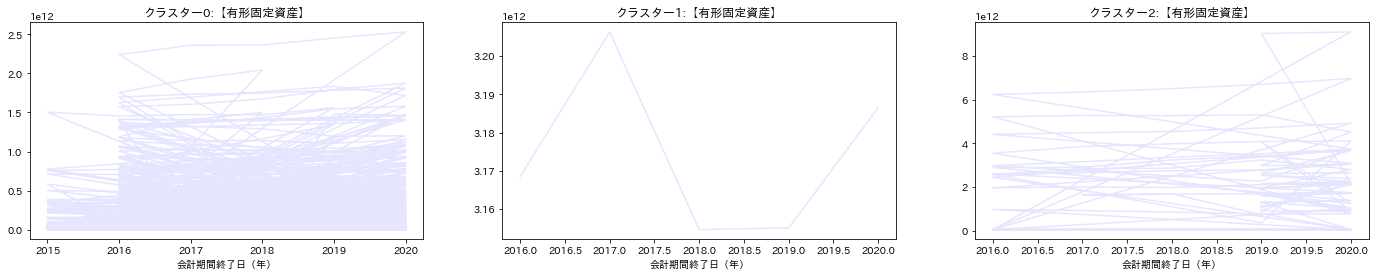

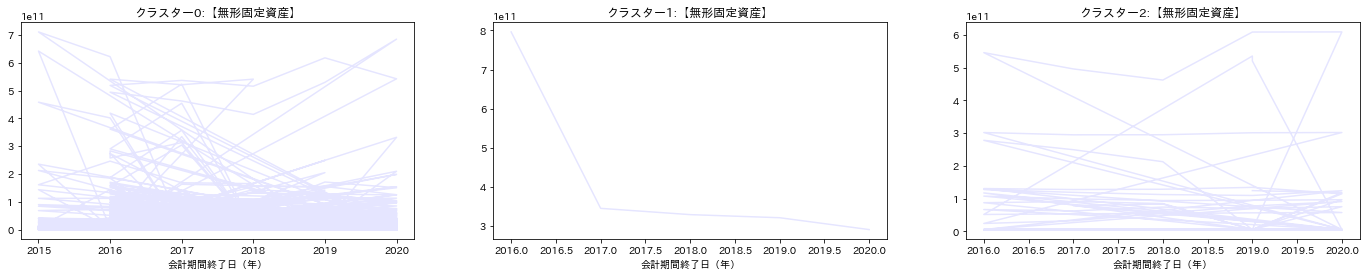

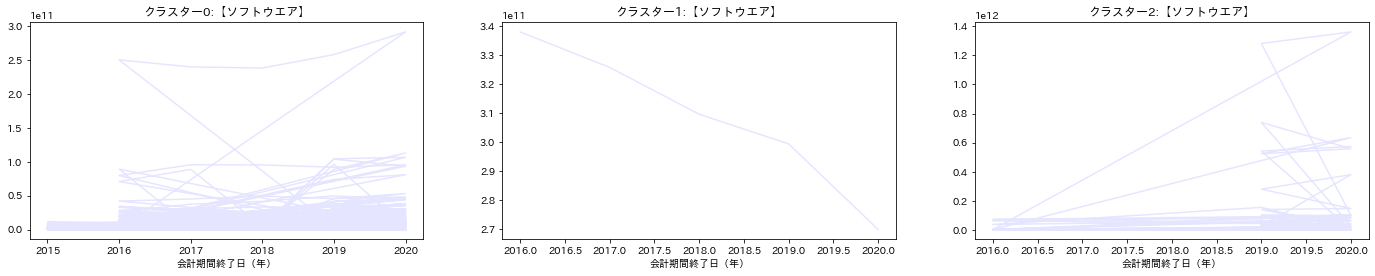

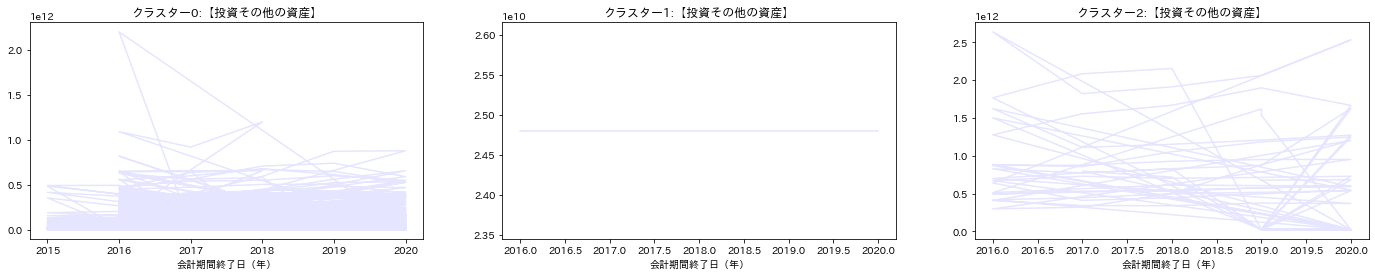

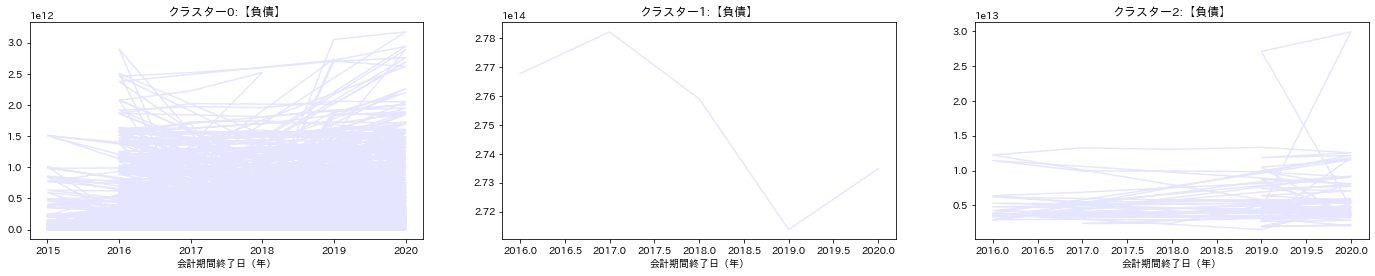

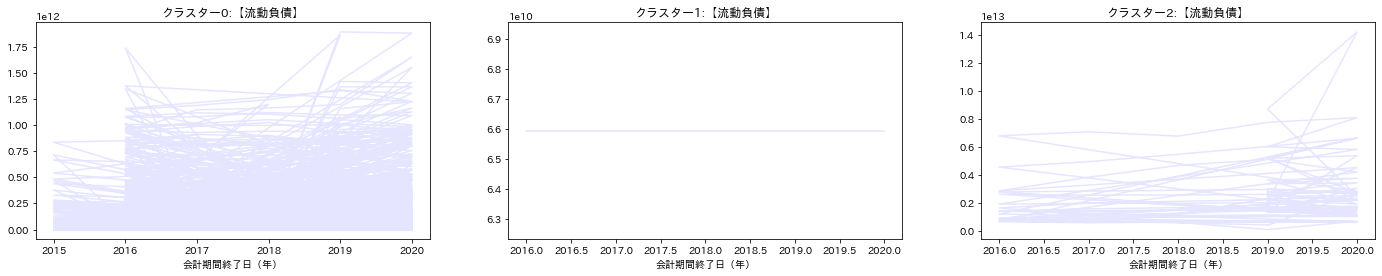

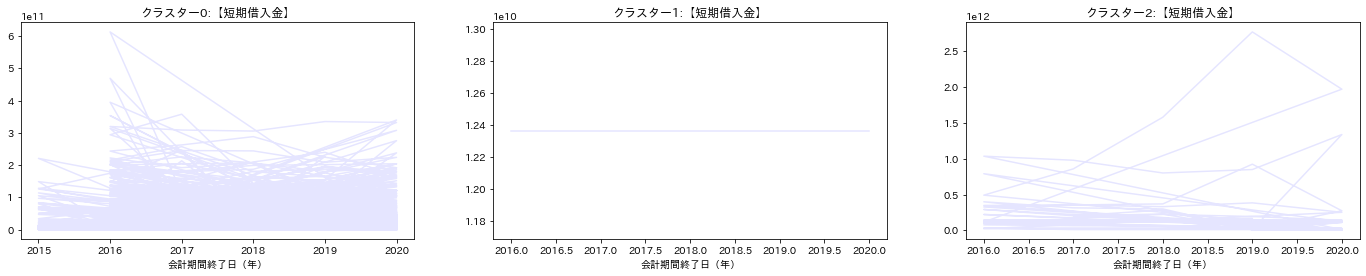

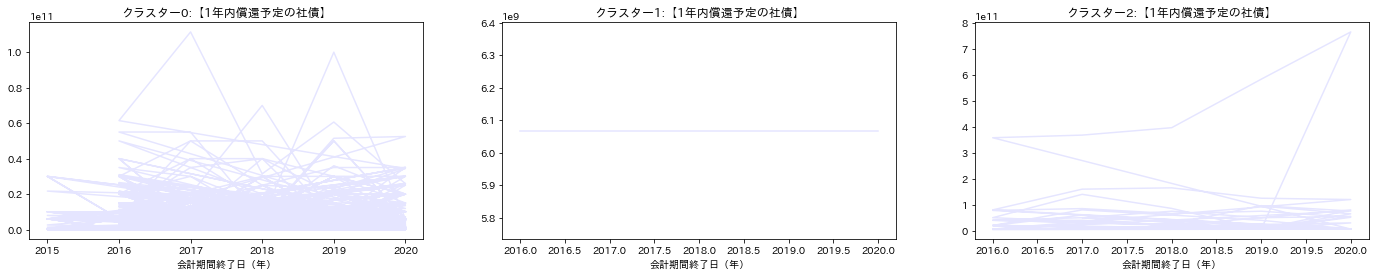

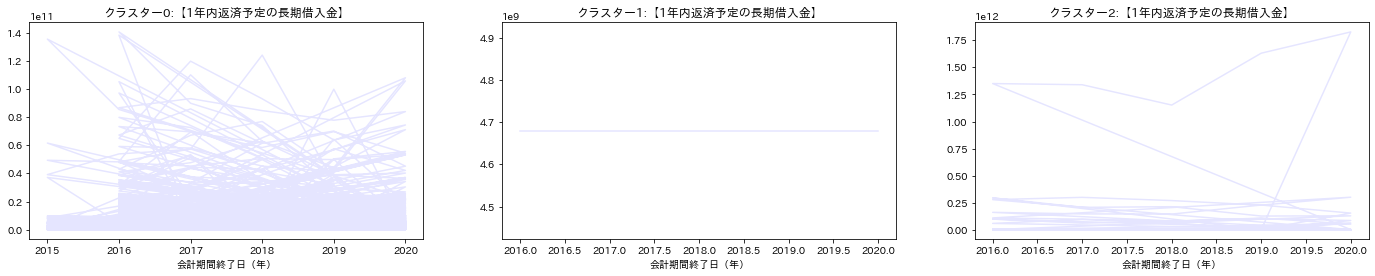

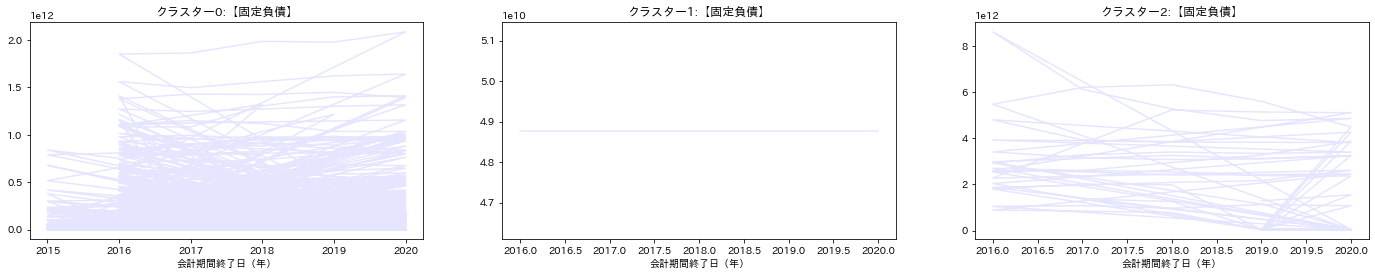

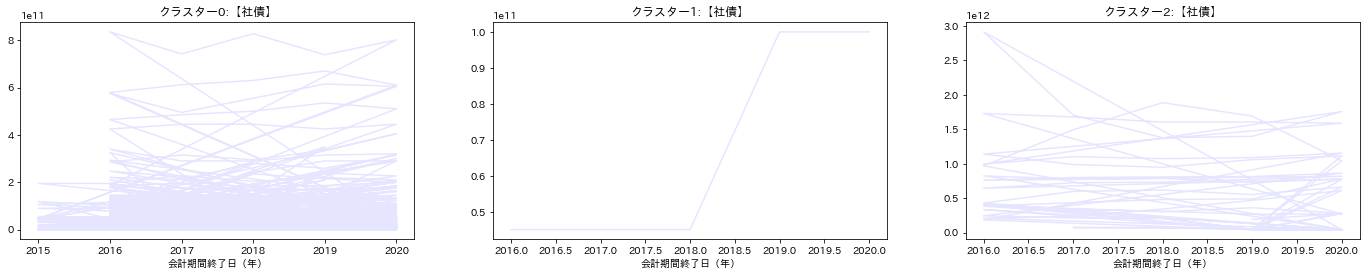

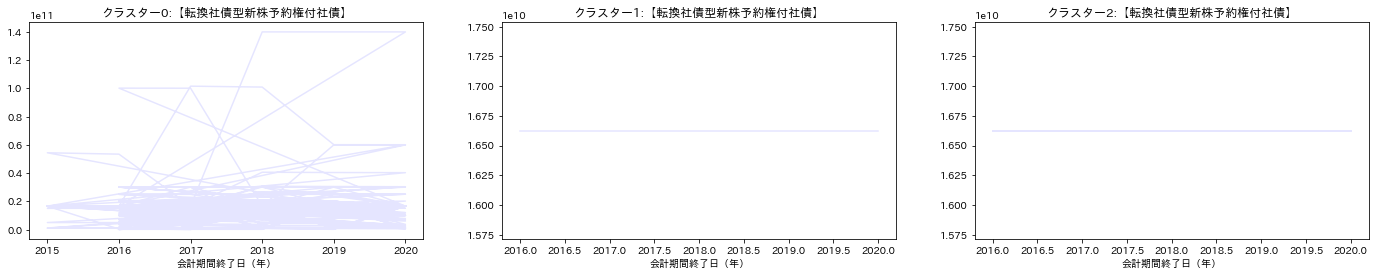

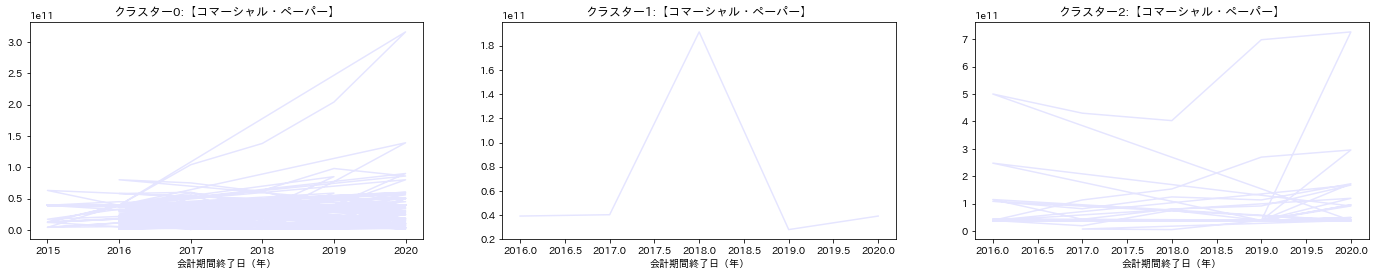

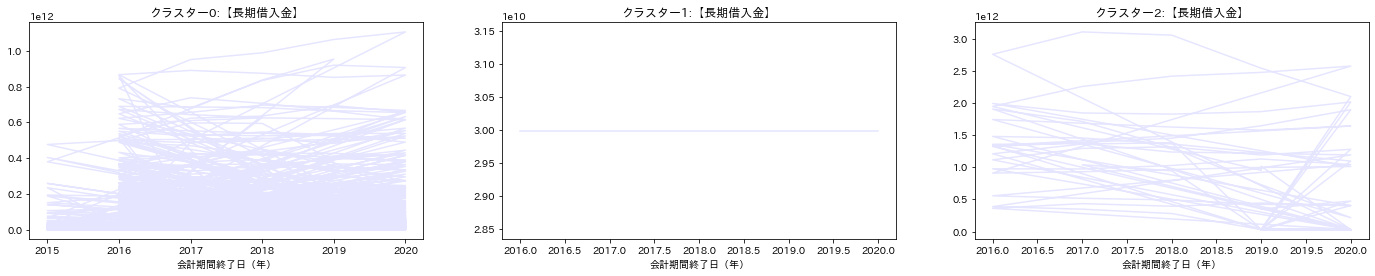

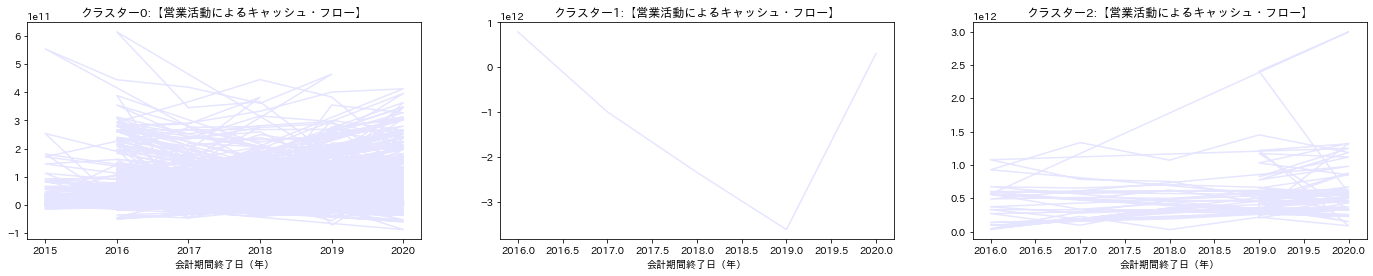

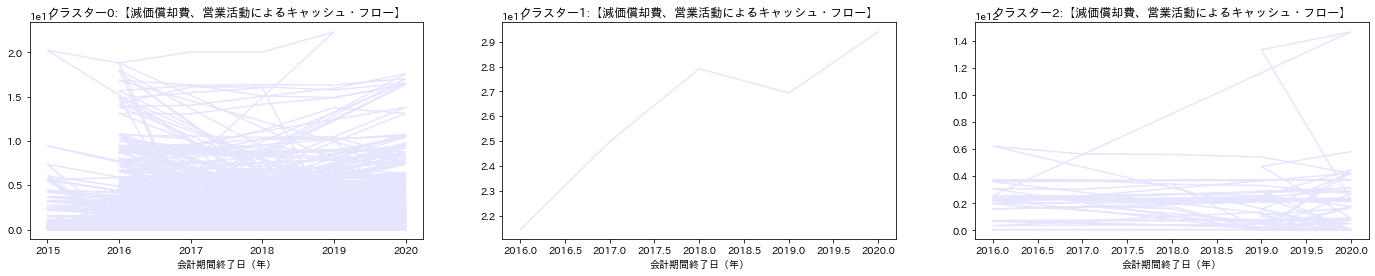

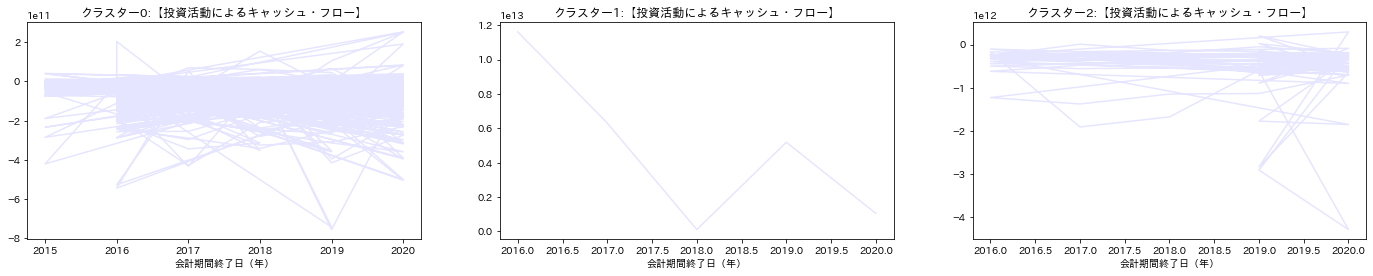

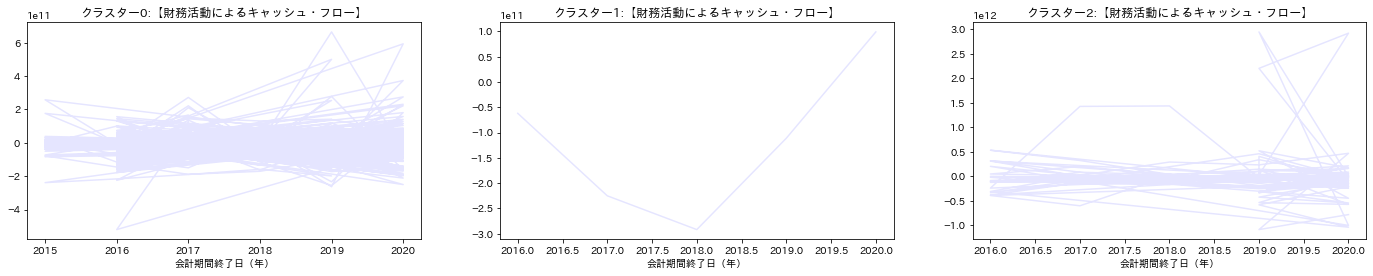

In [56]:
plotClusterResult(cluster_num, data, confirm_list, "大企業")

①典型的な安定企業

営業活動によるキャッシュ・フロー > 0

投資活動によるキャッシュ・フロー < 0

財務活動によるキャッシュ・フロー < 0

②積極投資の成長企業

営業活動によるキャッシュ・フロー > 0

投資活動によるキャッシュ・フロー < 0

財務活動によるキャッシュ・フロー > 0

In [57]:
tmp_data = pd.concat([large_df, data["cluster_labels"]], axis=1)
result_df_first = bool_first_company_conditions_result(tmp_data)
result_df_second = bool_second_company_conditions_result(tmp_data)
print("①典型的な安定企業の数：{0}, ②積極投資の成長企業の数：{1}".format(len(result_df_first.index), len(result_df_second.index)))

①典型的な安定企業の数：11100, ②積極投資の成長企業の数：2795


In [58]:
target = "会計期間終了日（年）"
groupbyTarget(cluster_num, result_df_first, target)

クラスター0
会計期間終了日（年）
2015     202
2016    2154
2017    2210
2018    2287
2019    2279
2020    1897
dtype: int64
クラスター1
Series([], dtype: int64)
クラスター2
会計期間終了日（年）
2016    11
2017     8
2018     9
2019    23
2020    20
dtype: int64


In [59]:
groupbyTarget(cluster_num, result_df_second, target)

クラスター0
会計期間終了日（年）
2015     49
2016    509
2017    522
2018    515
2019    602
2020    555
dtype: int64
クラスター1
Series([], dtype: int64)
クラスター2
会計期間終了日（年）
2016     5
2017     7
2018     7
2019    12
2020    12
dtype: int64


In [60]:
printIndustryRatio(result_df_first)

業種_サービス業       12.523249
業種_情報・通信業      11.717297
業種_小売業          9.857409
業種_卸売業          9.516429
業種_電気機器         7.191569
業種_機械           6.912585
業種_化学           6.385617
業種_建設業          4.711717
業種_食料品          3.812771
業種_不動産業         2.820831
業種_金属製品         2.820831
業種_輸送用機器        2.758834
業種_陸運業          1.983881
業種_医薬品          1.983881
業種_ガラス・土石製品     1.673900
業種_繊維製品         1.611903
業種_精密機器         1.487911
業種_鉄鋼           1.301922
業種_倉庫・運輸関連      1.177929
業種_非鉄金属         0.991940
業種_パルプ・紙        0.805952
業種_電気・ガス業       0.712957
業種_ゴム製品         0.588965
業種_海運業          0.371978
業種_石油・石炭製品      0.340980
業種_水産・農林業       0.309981
業種_鉱業           0.185989
業種_空運業          0.154991
dtype: float64


In [61]:
printIndustryRatio(result_df_second)

業種_サービス業       13.596491
業種_情報・通信業      11.215539
業種_小売業         10.087719
業種_卸売業          8.521303
業種_電気機器         7.518797
業種_化学           6.077694
業種_機械           5.764411
業種_不動産業         4.197995
業種_食料品          3.822055
業種_輸送用機器        3.696742
業種_建設業          3.508772
業種_陸運業          2.819549
業種_金属製品         2.631579
業種_鉄鋼           1.566416
業種_ガラス・土石製品     1.503759
業種_精密機器         1.441103
業種_繊維製品         1.441103
業種_電気・ガス業       1.315789
業種_医薬品          1.190476
業種_倉庫・運輸関連      1.190476
業種_海運業          0.814536
業種_非鉄金属         0.751880
業種_ゴム製品         0.751880
業種_パルプ・紙        0.563910
業種_石油・石炭製品      0.438596
業種_水産・農林業       0.438596
業種_鉱業           0.187970
業種_空運業          0.125313
dtype: float64


次元削減

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 主成分分析の結果をプロット
def donePca(data, feature_num):
  pca = PCA(n_components= feature_num)
  pca.fit(data)
  return pca

def plotPca(pca):
  plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [ ]:
# 行列の標準化
dfs = data.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.fillna(0, inplace=True)

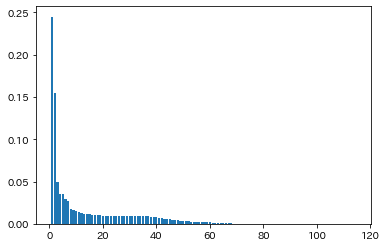

In [ ]:
# 各主成分の寄与率をグラフ化
pca = donePca(dfs, len(dfs.columns))
plotPca(pca)

In [ ]:
# 各主成分の寄与率の確認
np.set_printoptions(precision=5, suppress=True) # numpyの小数点以下表示桁数と、指数表記設定
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

explained variance ratio: [0.24498 0.15504 0.04913 0.03506 0.03469 0.02954 0.02684 0.01749 0.01652
 0.01523 0.01402 0.0122  0.01193 0.01148 0.01104 0.01049 0.01028 0.0101
 0.0099  0.00974 0.0097  0.00967 0.00954 0.00953 0.00949 0.0094  0.00935
 0.00932 0.00931 0.0093  0.00929 0.00928 0.00927 0.009   0.00892 0.00885
 0.0087  0.00857 0.00829 0.00805 0.00711 0.0066  0.00618 0.00583 0.00529
 0.00503 0.00427 0.00412 0.00372 0.00335 0.00315 0.00287 0.00235 0.00231
 0.00204 0.00197 0.00185 0.0017  0.00166 0.00164 0.00135 0.00125 0.00076
 0.00069 0.00061 0.0005  0.00043 0.0004  0.00035 0.00032 0.00031 0.00027
 0.00024 0.00021 0.00015 0.0001  0.00009 0.00008 0.00008 0.00005 0.00004
 0.00004 0.00003 0.00003 0.00002 0.00002 0.00001 0.00001 0.00001 0.00001
 0.00001 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     ]


In [ ]:
# DataFrameオブジェクトのカラムをIndex、各主成分の寄与率を値、としてDataFrameオブジェクト作成
pca_df = pd.DataFrame(pca.explained_variance_ratio_, index=dfs.columns, columns=["principal"])

In [ ]:
# 主成分の寄与率が大きい順に並び替え
pca_df.sort_values('principal', ascending=False)

,principal
従業員数,2.449846e-01
平均臨時雇用人員,1.550370e-01
所有株式数,4.912855e-02
発行済株式（自己株式を除く。）の総数に対する所有株式数の割合,3.505797e-02
発行済株式総数,3.468609e-02
...,...
業種_非鉄金属,1.102462e-33
業種_食料品,1.102462e-33
提出日(年),1.102462e-33
会計期間終了日(年),1.102462e-33


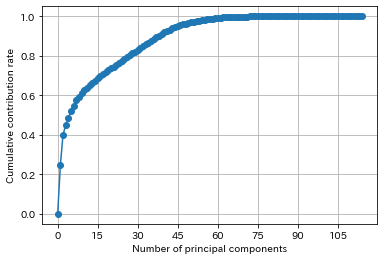

In [ ]:
# 主成分の累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# Padnasのcumsum()メソッドは途中で処理抜けられないっぽいので、ラッパー関数を自作
# for文を使いたくなかったけど、思いつかず...
def principal_column_list(ser, pca_list):
  cumsum = 0
  for index in ser.index:
    cumsum += ser[index]
    if cumsum < 0.8:          # 累積寄与率75%～80%が目安らしいので、80%を目途で
      pca_list.append(index)
    else:                     # 累積寄与率が80%に達したら、処理を抜ける
      break

In [ ]:
# 累積寄与率80%を越えるカラムのリストを作成
pca_list = []
pca_df.sort_values('principal', ascending=False).apply(lambda ser: principal_column_list(ser, pca_list))
pca_list

['従業員数',
 '平均臨時雇用人員',
 '所有株式数',
 '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合',
 '発行済株式総数',
 '連結子会社の数',
 '１株当たり純資産',
 '自己資本比率',
 '現金及び現金同等物の残高',
 '資産',
 '流動資産',
 '固定資産',
 '有形固定資産',
 '無形固定資産',
 'ソフトウエア',
 '投資その他の資産',
 '負債',
 '流動負債',
 '短期借入金',
 '1年内償還予定の社債',
 '1年内返済予定の長期借入金',
 '固定負債',
 '社債',
 '転換社債型新株予約権付社債',
 'コマーシャル・ペーパー',
 '長期借入金']

In [ ]:
# 各主成分の累積寄与率が80%を越えるカラムでDataFrameオブジェクトを作成
pca_df = pd.DataFrame(pca_df, columns = pca_list)
pca_df.fillna(0, inplace=True)

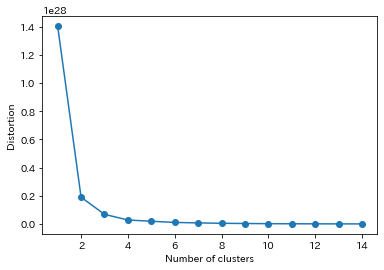

In [ ]:
elbowMethod(len(pca_df.index))

In [ ]:
km = doneKmeans(3, pca_df)

In [ ]:
# 各クラスタリングをグラフで表示
x = pd.unique(pca_df["会計期間終了日(年)"])
#plt.xticks(data["会計期間終了日(年)"], [2016, 2017, 2018, 2019, 2020])   
for col in confirm_list:
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))
  for i in range(cluster_num):
    plt.xticks(range(len(x)), x)
    pca_df[pca_df["cluster_labels"] == i].plot(x=pca_df["会計期間終了日(年)"].name, y=pca_df[col].name, ax=axes[i], title="".join(["クラスター", "",str(i) ,":【", col, "】"]), color='blue', alpha=0.3, legend=False)
  plt.savefig("".join(["中小企業:【", col, "】.png"]))

モデルの性能評価

In [ ]:
from sklearn.metrics import classification_report